# De l’exception à la norme : le jeu révolutionnaire des Golden State Warriors son impact sur le basketball moderne

« En NBA, les équipes médiocres essayent de copier les meilleures mais les franchises qui bousculent la hiérarchie sont celles qui trouvent leur propre chemin », a dit le spécialiste de la NBA (la ligue américaine de basketball) et historien du sport Curtis Harris.

Parmi les 30 franchises de la NBA, une, les Golden States Warriors, s'est distinguée par des résultats exceptionnels depuis la saison 2014-2015 et - justement - par ce qui semble être la création d'un nouveau chemin, d'une nouvelle stratégie pour gagner au basket. La franchise basée à San Francisco, jusqu'alors dans le ventre mou de la NBA, a depuis dominé de la tête et des épaules le championnat majeur, que ce soit dans le cours de la saison régulière, avec une saison record à 73 victoires pour 9 défaites en 2015-2016, ou dans les play-offs (phases des séries éliminatoires) : quintuple champion en titre de la conférence Ouest, les Warriors ont gagné 3 des 5 dernières finales NBA.
 
L’équipe de San Francisco a ainsi formé la première dynastie dans la NBA du XXIe siècle, grâce à **un style de jeu considéré comme révolutionnaire**. En effet, selon les commentateurs, **les Warriors ont imposé le tir à 3 points comme la nouvelle norme**. En capitalisant sur des joueurs extrêmement doués dans les tirs de loin tels que le désormais célebrissime Stephen Curry, Klay Thompson ou encore Kevin Durant, le ratio tirs à 3 points sur tirs des Golden State Warriors a avoisiné les 50% : impensable dans la ligue d'il y a 10 ans, où les Magic dominaient ce ratio en dépassant péniblement les 30%. Il faut dire que le 3 points a mis longtemps à s'imposer : d'abord décrié comme un "gadget" par le New York Times à son introduction, il fut ensuite longtemps boudé par les joueurs qui lui préféraient le combat physique de la raquette (sous le panier).

Ainsi le spectaculaire Stephen Curry, surnommé "Three Pointer", donne-t-il ses lettres de noblesse à une discipline autrefois méprisée **en explosant  de 50% le précédent record de paniers à 3 points réussis en une saison**, en 2015-2016. 

Pour atteindre cette quantité de 3 points tentés et réussis, les Warriors ont développé le système de 'small ball', avec de plus petits joueurs, pour valoriser l'agilité, la rapidité et le tir à trois points au détriment de la force physique et du jeu dans la raquette.


Tous les observateurs s’accordent à dire que le basket proposé par cette équipe, qui a conservé son effectif quasi inchangé entre les saisons 2014-2015 et 2018-2019, était non seulement **révolutionnaire** en 2014, mais est aujourd’hui **devenu la norme**, transformant ainsi radicalement le style de jeu des autres équipes. Dixit l'un des principaux concernés, l'ailier français des Hornets de Charlotte Nicolas Batum, « Toute la ligue s’est adaptée en jouant avec un seul intérieur et quatre joueurs capables de marquer à trois points ».

Reste maintenant à se plonger dans la donnée, et à se poser deux questions. L'une est à l'échelle macroscopique : *à quelles évolutions le basketball américain (et mondial ?) le style des Warriors préfigure-t-il ?*
L'autre est à l'échelle microscopique : *comment les Warriors ont-ils évolué depuis 2010, et comment peuvent-il faire pour continuer à avoir une stratégie différenciante si, comme semble le dire Harris, toutes les franchises les copient ?*

Nous chercherons ainsi au fil de ce projet à caractériser statistiquement le "Warriors Effect" au sein de la NBA. Nous nous demanderons ainsi comment la franchise de Golden State a pu construire un style de jeu unique, pour la mener en l'espace de dix ans du statut de mauvaise équipe à celui de "superteam" ultra-dominante. Nous étudierons également la transformation du style de jeu des équipes de la Ligue, en réponse à cette nouvelle approche du basket, avant de faire un détour par la France et la Pro A pour observer un éventuel impact transatlantique du W-style. Enfin, nous soulignerons l'aptitude des Warriors à garder une différenciation par l'efficacité, qui a garanti leur hégémonie jusqu'en 2019.


In [1]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

### Un point de vocabulaire et de glossaire

On peut classer les statistiques collectées pour chacune des 30 équipes en deux grands secteurs de jeu : 

<font color= green>Le secteur défensif : </font>
* DRB (Defensive Rebounds) : Les rebonds récupérés en défense, quand l'équipe adverse rate un tir
* STL (Steals) : Les interceptions réalisées
* BLK (Blocks) : Les tirs adverses contrés 
* PF (Personal Fouls) : Les fautes commises en défense

<font color= green>Le secteur offensif, qu'on peut subdiviser en deux catégories :</font>
* Les tirs : 
    * FT (Free Throws) : Le nombre de lancers réussis
    * FTA (Free Throws Attempts) : Le nombre de lancers tentés    
    * 2P (2-points shots) : Les tirs à 2 points réussis
    * 2PA (2-points shots attempts) : Les tirs à 2 points tentés
    * 3P (3-points shots) : Les tirs à 3 points réussis
    * 3PA (3-points shots attempts) : Les tirs à 3 points tentés
    * FG (Field Goals) : Le nombre total de  tirs réussis
    * FGA (Field Goals attempts) : Le nombre total de  tirs tentés

* Les autres choix offensifs : 
    * ORB (Offensive Rebounds) : Les rebonds récupérés en attaque, quand l'équipe a raté son tir
    * AST (Assists) : Les passes décisives amenant des tirs réussis. Elles sont symboles d'un jeu collectif prégnant
    
<font color= green>Enfin les catégories restantes : </font>
* Tm : Le nom de l'équipe, **assorti d'une * si elle a participé aux playoffs** (dans le Top 8 de sa conférence)
* W : Le nombre de victoires, sur les 82 matchs

Le site [Basketball Reference](http://www.basketball-reference.com) regroupe toute l'information dont nous avons besoin, à savoir toutes les statistiques des différents secteurs de jeu des saisons de la décennie 2010

## I. Scrapping des données

In [2]:
import urllib
import bs4
from urllib.request import urlopen
import bs4
from bs4 import BeautifulSoup
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as skm
from sklearn.cluster import KMeans
from sklearn import datasets
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import scipy
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.stats import norm
from urllib import request

### A. Récupération des statistiques des saisons 2014-2015, 2015-2016 et 2016-2017 : La révolution 



Dans un premier temps, nous collectons des données sur le site basketball reference, à l'aide de méthodes de scrapping. A cause de bugs d'affichage dans la base de données, nous effectuons ce travail en trois temps.

In [3]:
url_nba = "https://www.basketball-reference.com/play-index/tsl_finder.cgi?request=1&match=single&type=team_totals&year_min=2015&year_max=2019&lg_id=NBA&order_by=year_id&order_by_asc=Y"

request_text = request.urlopen(url_nba).read()
page = bs4.BeautifulSoup(request_text, "lxml")

In [4]:
headers = [th.getText() for th in page.findAll("thead")[0].findAll('th')]    #Récuperer tous les titres de colonnes 

del(headers[0], headers[0], headers[0])    # Les 3 premiers sont des "sur-colonnes", on les supprime
print(headers)
print(len(headers))

['Season', 'Tm', 'Lg', 'G', 'W', 'L', 'W/L%', 'MP', 'FG', 'FGA', '2P', '2PA', '3P', '3PA', 'FT', 'FTA', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']
25


In [5]:
rows = page.findAll('tr')[1:]         #Pour les 106 lignes du tableau du site, on récupère les stats
team_stats = [[td.getText() for td in rows[i].findAll('td')]
            for i in range(len(rows))]

In [6]:
stats = pd.DataFrame(team_stats, columns = headers)     # On a un tableau à 104 lignes  
stats = stats.drop([0,21,42,63,84])                       # Suppression des lignes vides 
stats1 = stats[0:90]                                      # On s'arrête à la saison 2016-2017, dernière complète
stats1.groupby('Season').head(2)                         # Ici on a donc les saisons 2014-2015, 2015-2016, 2016-2017

,Season,Tm,Lg,G,W,L,W/L%,MP,FG,FGA,...,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,2014-15,ATL*,NBA,82,60,22,.732,19730,3121,6699,...,1735,715,2611,3326,2111,744,380,1167,1457,8409
2,2014-15,BOS*,NBA,82,40,42,.488,19880,3193,7211,...,1678,910,2685,3595,2009,674,294,1133,1738,8312
32,2015-16,ATL*,NBA,82,48,34,.585,19830,3168,6923,...,1638,679,2772,3451,2100,747,486,1226,1570,8433
33,2015-16,BOS*,NBA,82,48,34,.585,19780,3216,7318,...,1929,950,2733,3683,1981,752,348,1127,1796,8669
64,2016-17,ATL*,NBA,82,43,39,.524,19880,3123,6918,...,2039,842,2793,3635,1938,672,397,1294,1491,8459
65,2016-17,BOS*,NBA,82,53,29,.646,19755,3168,6978,...,1903,744,2698,3442,2069,617,340,1088,1686,8857


Le jeu de données du site présente un **bug d'affichage pour certaines saisons** sur la page précedement scrappée, par conséquent **nous allons scrapper d'autres url**, qui cette fois regroupe toutes les valeurs. 

### B. Collecte des statistiques des saisons 2017-2018 et 2018-2019 : "L'après Golden State"

In [7]:
url_nba = "https://www.basketball-reference.com/play-index/tsl_finder.cgi?request=1&match=single&type=team_totals&year_min=2018&year_max=2019&lg_id=NBA&order_by=year_id&order_by_asc=Y"

request_text = request.urlopen(url_nba).read()
page4 = bs4.BeautifulSoup(request_text, "lxml")

In [8]:
rows4 = page4.findAll('tr')[1:]         #Pour les 30 lignes du tableau du site, on récupère les stats
team_stats4 = [[td.getText() for td in rows4[i].findAll('td')]
            for i in range(len(rows4))]

In [9]:
stats2 = pd.DataFrame(team_stats4, columns = headers)  
stats2 = stats2.drop([0,21,42])   
stats2.groupby("Season").head(2) #Ici on a 2017-2018 et 2018-2019

,Season,Tm,Lg,G,W,L,W/L%,MP,FG,FGA,...,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,2017-18,ATL,NBA,82,24,58,.293,19705,3130,7015,...,1654,743,2693,3436,1946,638,348,1276,1606,8475
2,2017-18,BOS*,NBA,82,55,27,.671,19805,3141,6975,...,1697,767,2878,3645,1842,604,373,1149,1618,8529
32,2018-19,ATL,NBA,82,29,53,.354,19855,3392,7524,...,1918,955,2825,3780,2118,675,419,1397,1932,9294
33,2018-19,BOS*,NBA,82,49,33,.598,19780,3451,7423,...,1598,804,2849,3653,2155,706,435,1052,1670,9216


In [10]:
url_nba2013 = "https://www.basketball-reference.com/play-index/tsl_finder.cgi?request=1&match=single&type=team_totals&year_min=2014&year_max=2014&lg_id=NBA&order_by=team_name&order_by_asc=Y"

request_text = request.urlopen(url_nba2013).read()
page2013 = bs4.BeautifulSoup(request_text, "lxml")

In [11]:
rows2013 = page2013.findAll('tr')[1:]         #Pour les 30 lignes du tableau du site, on récupère les stats
team_stats2013 = [[td.getText() for td in rows2013[i].findAll('td')]
            for i in range(len(rows2013))]

In [12]:
stats_2013 = pd.DataFrame(team_stats2013, columns = headers)  
stats_2013 = stats_2013.drop([0,21])
stats_2013.groupby('Season').head()

,Season,Tm,Lg,G,W,L,W/L%,MP,FG,FGA,...,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,2013-14,ATL*,NBA,82,38,44,.463,19830,3061,6688,...,1782,713,2565,3278,2041,680,326,1251,1577,8282
2,2013-14,BOS,NBA,82,25,57,.305,19730,2996,6883,...,1706,980,2505,3485,1726,584,343,1261,1743,7892
3,2013-14,BRK*,NBA,82,44,38,.537,19880,2931,6391,...,2002,721,2407,3128,1714,705,311,1191,1777,8079
4,2013-14,CHA*,NBA,82,43,39,.524,19905,2976,6730,...,2000,776,2724,3500,1778,499,421,1010,1493,7942
5,2013-14,CHI*,NBA,82,48,34,.585,19930,2843,6577,...,1908,937,2683,3620,1860,594,424,1223,1565,7680


### C. Jeux de données des saisons 2010-2011, 2011-2012, 2012-2013, 2013-2014 : "L'avant Golden State" 

In [13]:
url_nba5 = "https://www.basketball-reference.com/play-index/tsl_finder.cgi?request=1&match=single&type=team_totals&year_min=2011&year_max=2014&lg_id=NBA&order_by=year_id&order_by_asc=Y"

request_text = request.urlopen(url_nba5).read()
page5 = bs4.BeautifulSoup(request_text, "lxml")

In [14]:
rows5 = page5.findAll('tr')[1:]         #Pour les 30 lignes du tableau du site, on récupère les stats
team_stats5 = [[td.getText() for td in rows5[i].findAll('td')]
            for i in range(len(rows5))]

In [15]:
stats4 = pd.DataFrame(team_stats5, columns = headers)  
stats4 = stats4.drop([0,21,42,63,84])
stats4 = stats4[0:90]
stats4.groupby('Season').head(2)                    #Ici on a 2010-2011, 2011-2012, 2012-2013

,Season,Tm,Lg,G,W,L,W/L%,MP,FG,FGA,...,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,2010-11,ATL*,NBA,82,44,38,.537,19730,2971,6429,...,1728,762,2460,3222,1802,497,341,1118,1554,7790
2,2010-11,BOS*,NBA,82,56,26,.683,19780,3023,6219,...,1895,639,2542,3181,1921,676,344,1195,1678,7913
32,2011-12,ATL*,NBA,66,40,26,.606,16165,2429,5348,...,1385,652,2066,2718,1481,536,303,921,1178,6375
33,2011-12,BOS*,NBA,66,39,27,.591,15940,2341,5086,...,1308,509,2051,2560,1557,498,362,979,1315,6062
64,2012-13,ATL*,NBA,82,44,38,.537,19855,3084,6644,...,1619,758,2593,3351,2007,664,369,1219,1473,8032
65,2012-13,BOS*,NBA,81,41,40,.506,19840,3001,6459,...,1698,654,2533,3187,1843,667,365,1181,1717,7818


### D. Concaténation des bases

In [16]:
Stats = pd.concat([stats4, stats_2013, stats1, stats2], ignore_index = True) #On concatène les tableaux précédemment obtenus
Stats = Stats.drop_duplicates(keep='first')                      #On supprime d'éventuels doublons
Stats = Stats.drop(['Lg', 'G', 'L', 'W/L%', 'MP'], axis=1)     #Information redondante ou inutile
print(Stats)

      Season    Tm   W    FG   FGA    2P   2PA    3P   3PA    FT   FTA   ORB  \
0    2010-11  ATL*  44  2971  6429  2469  5002   502  1427  1346  1728   762   
1    2010-11  BOS*  56  3023  6219  2615  5100   408  1119  1459  1895   639   
2    2010-11   CHA  34  2873  6365  2480  5162   393  1203  1511  1999   848   
3    2010-11  CHI*  62  3042  6587  2531  5172   511  1415  1492  2008   967   
4    2010-11   CLE  19  2886  6647  2377  5158   509  1489  1546  2075   856   
5    2010-11  DAL*  57  3069  6463  2424  4695   645  1768  1437  1850   780   
6    2010-11  DEN*  50  3145  6613  2483  4909   662  1704  1859  2429   791   
7    2010-11   DET  30  3056  6647  2584  5391   472  1256  1367  1854   931   
8    2010-11   GSW  36  3251  7047  2566  5298   685  1749  1290  1695   955   
9    2010-11   HOU  43  3170  6975  2493  5132   677  1843  1668  2083   962   
10   2010-11  IND*  37  3003  6787  2418  5134   585  1653  1592  2035   914   
11   2010-11   LAC  32  3015  6594  2502

### E.  Scrapping complémentaire des masses salariales

Sur le site [HoopShype](http://hoopshype.com), nous avons pu trouver des données sur la **masse salariale** (appelée abusivement budget par la suite) de chaque équipe sur notre période d'étude. La masse salariale de chaque saison est répertoriée sur une page.

Nous avons pensé qu'il pourrait être opportun d'avoir des données sur la masse salariale afin de s'interroger sur l'efficacité du recrutement de stars à haut salaire et de l'efficacité du paiement de la très coûteuse *luxury tax*, pour les franchises dépassant le *salary cap*, plafond général fixé chaque année sur les dépenses salariales.


In [17]:
def scrapping_budget(i,j): #Définition d'une fonction scrappant les masses salariales des équipes pour la saison i-j
    url_nba_w = "https://hoopshype.com/salaries/"+str(i)+"-"+str(j)+"/"     #Structure similaire des URL
    request_text = request.urlopen(url_nba_w).read()                          #Scrapping
    page = bs4.BeautifulSoup(request_text, "lxml")
    rows = page.findAll('table')
    pd.read_html(str(rows))[0]
    budg=pd.read_html(str(rows))[0]
    budg.columns=['Sh','Team','Budget','Budget*']                #On renomme les colonnes
    budg['Season']=str(i)+'-'+str(j)[2:4]                   #Création d'une colonne Season, pour fusionner 
    budget=budg.drop(['Sh','Budget*'], axis=1)              #Informations inutiles pour notre étude
    return budget

In [18]:
## On crée un grand tableau répertoriant les budgets de chaque équipe pour chaque saison en concaténant chacun des tableaux obtenus de 2010-2011 a 2018-2019
big_tableau_budget=scrapping_budget(2010,2011)        
for i in range(2011,2019):
    j=i+1
    big_tableau_budget=pd.concat([big_tableau_budget,scrapping_budget(i,j)])
    i=+1
big_tableau_budget=big_tableau_budget.reset_index() #Pour éviter d'avoir plusieurs lignes avec le même index

In [19]:
big_tableau_budget.head()

,index,Team,Budget,Season
0,0,LA Lakers,"$91,428,140",2010-11
1,1,Orlando,"$90,770,804",2010-11
2,2,Dallas,"$85,409,890",2010-11
3,3,Boston,"$82,045,867",2010-11
4,4,Utah,"$75,855,296",2010-11


In [20]:
#Comme on le voit, le budget est exprimé de façon illisible pour Python : on se charge de supprimer les "$" et les "," pour pouvoir
#convertir les budgets en float

#ATTENTION : nous n'avons pas trouvé de manière plus efficace de procéder mais cette boucle for agissant sur 270 lignes, elle prend un bout de temps...

for i in range(0,270):
    big_tableau_budget["Budget"][i]=float(big_tableau_budget['Budget'][i].replace('$','').replace(',',''))
    i=+1


/Users/clementchaffard/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [21]:
#On exprime les budgets en M$, pour plus de lisibilité
big_tableau_budget['Budget']=big_tableau_budget['Budget']/1000000 

In [22]:
egal= pd.DataFrame({'Team': ['Atlanta','Dallas','Sacramento','LA Lakers','Phoenix','Indiana','Chicago','Utah','Orlando','Philadelphia','New Orleans','LA Clippers','Denver','Brooklyn','Charlotte','San Antonio','Minnesota','Cleveland','New York','Washington','Boston','Memphis','Houston','Detroit','Portland','Milwaukee','Toronto','Oklahoma City','Golden State','Miami']
                    , 'Tms': ['ATL','DAL','SAC','LAL','PHO','IND','CHI','UTA','ORL','PHI','NOP','LAC','DEN','BRK','CHO','SAS','MIN','CLE','NYK','WAS','BOS','MEM','HOU','DET','POR','MIL','TOR','OKC','GSW','MIA']})
big_table_budget= big_tableau_budget.merge(egal, on=["Team"], how="outer")
#On crée une colonne Tms, qui servira à la fusion de notre tableau des budgets avec notre tableau principal. 
#Pour ce faire, on crée une df auxiliaire associant à chaque dénomination de hoopshype le code à 3 lettres de basketball reference

In [23]:
big_table_budget=big_table_budget.drop(['Team','index'], axis=1) #Colonnes devenues inutiles

### F. Récupération des données de stabilité des effectifs entre 2014-2015 et 2018-2019 

Une autre caractéristique majeure des Warriors est la **stabilité impressionnante de leur effectif** depuis la saison 2014-2015. Nous avons donc construit un indicateur comptant le nombre de membres communs du 5 majeur (titulaires) 2014-2015 et 2018-2019 pour chaque franchise. 

Nous avons répertorié dans un document Excel cet indicateur.

In [24]:
Stab_Effectif = pd.read_excel("Stab_NBA.xlsx",'Stab_Teams')
Stab_Effectif.head() 

,Tms,Stability
0,ATL,0
1,BOS,1
2,BRK,0
3,CHI,0
4,CHO,2


### G. Fusion des tables 

In [25]:
STATS=Stats
STATS['Tms'] = STATS.apply(lambda _: '', axis=1) 

for i in range(0,270):
    STATS["Tms"][i]=str(STATS['Tm'][i])[0:3]
    i=+1
#Création de la colonne "pivot" Tms, qui associe à chaque franchise un code à 3 lettres. 
#Tms est construit en enlevant les "*" de [Tm], signifiant "l'équipe XXX a participé aux playoffs lors de la saison Season"

In [26]:
STATS['Tms']=STATS['Tms'].replace(['NJN','NOH','CHA'],['BRK','NOP','CHO'])
#Certaines franchises ont changé de nom depuis 2010 ! On remplace les New Jersey Nets par leurs héritiers de Brooklyn,
#les New Orleans Hornets par les Pelicans de la même ville, et les Charlotte Bobcats par les Charlotte Hornets. 

In [27]:
mega_Stats=STATS.merge(big_table_budget, on=["Tms",'Season'], how="outer")
mega_Stats=mega_Stats.merge(Stab_Effectif, on='Tms',how='outer')
mega_Stats.head() #Fusion des tableaux de statistiques, de masse salariale ; puis du gros tableau et du tableau répertoriant la stabilité des effectifs

,Season,Tm,W,FG,FGA,2P,2PA,3P,3PA,FT,...,TRB,AST,STL,BLK,TOV,PF,PTS,Tms,Budget,Stability
0,2010-11,ATL*,44,2971,6429,2469,5002,502,1427,1346,...,3222,1802,497,341,1118,1554,7790,ATL,71.4698,0
1,2011-12,ATL*,40,2429,5348,1937,4018,492,1330,1025,...,2718,1481,536,303,921,1178,6375,ATL,73.6699,0
2,2012-13,ATL*,44,3084,6644,2378,4743,706,1901,1158,...,3351,2007,664,369,1219,1473,8032,ATL,66.7102,0
3,2013-14,ATL*,38,3061,6688,2293,4572,768,2116,1392,...,3278,2041,680,326,1251,1577,8282,ATL,58.9987,0
4,2014-15,ATL*,60,3121,6699,2303,4547,818,2152,1349,...,3326,2111,744,380,1167,1457,8409,ATL,58.3203,0


### H. Préparation de sous-tables et de variables complémentaires 

In [28]:
mega_Stats['R_Budget']=mega_Stats['Budget'].astype(float)/np.mean(mega_Stats['Budget'].astype(float))
mega_Stats['%3P']=mega_Stats['3P'].astype(float)/mega_Stats['3PA'].astype(float)

mega_Stats['W']=mega_Stats["W"].astype(int)
quantile8_30=(mega_Stats.groupby('Season')['W']).quantile(0.70)
mega_Stats= mega_Stats.merge(quantile8_30, on=["Season"], how="outer")
mega_Stats["Win_Indic"] = mega_Stats.apply ( lambda row : (row["W_x"] > row["W_y"]) , axis = 1 ) 
mega_Stats.groupby('Season').head()
mega_Stats['W']=mega_Stats['W_x']
mega_Stats.drop(['W_x','W_y'],axis=1)
mega_Stats.head()
#Création de variables complémentaires

,Season,Tm,W_x,FG,FGA,2P,2PA,3P,3PA,FT,...,PF,PTS,Tms,Budget,Stability,R_Budget,%3P,W_y,Win_Indic,W
0,2010-11,ATL*,44,2971,6429,2469,5002,502,1427,1346,...,1554,7790,ATL,71.4698,0,0.857271,0.351787,48.6,False,44
1,2010-11,BOS*,56,3023,6219,2615,5100,408,1119,1459,...,1678,7913,BOS,82.0459,1,0.984129,0.364611,48.6,True,56
2,2010-11,CHA,34,2873,6365,2480,5162,393,1203,1511,...,1637,7650,CHO,66.5427,2,0.798171,0.326683,48.6,False,34
3,2010-11,CHI*,62,3042,6587,2531,5172,511,1415,1492,...,1639,8087,CHI,54.5381,0,0.654177,0.361131,48.6,True,62
4,2010-11,CLE,19,2886,6647,2377,5158,509,1489,1546,...,1648,7827,CLE,53.99,0,0.647603,0.341840,48.6,False,19


In [29]:
stats = Stats.set_index('Tm')   # Le nom de l'équipe + '*' si participation aux playoffs 
                                # devient l'index, ce qui simplifiera 
                                # la représentation sur des graphiques

In [30]:
def stat_season(debut_season,fin_season):
    stat=stats.groupby('Season').get_group(str(debut_season)+'-'+str(fin_season)[2:4])
    stat=stat.drop(['Season','Tms'],axis=1)
    return stat

#On crée une fonction qui extrait du tableau intermédiaire les stats d'une saison donnée

In [31]:
stats2010=stat_season(2010,2011)
stats2011=stat_season(2011,2012)
stats2012=stat_season(2012,2013)
stats2013=stat_season(2013,2014)
stats2014=stat_season(2014,2015)
stats2015=stat_season(2015,2016)
stats2016=stat_season(2016,2017)
stats2017=stat_season(2017,2018)
stats2018=stat_season(2018,2019)

In [32]:
def stat_season_(debut_season,fin_season):
    stat=mega_Stats.groupby('Season').get_group(str(debut_season)+'-'+str(fin_season)[2:4])
    return stat

#On crée une fonction qui extrait du gros tableau les stats d'une saison donnée

In [33]:
stats2010_=stat_season_(2010,2011)
stats2011_=stat_season_(2011,2012)
stats2012_=stat_season_(2012,2013)
stats2013_=stat_season_(2013,2014)
stats2014_=stat_season_(2014,2015)
stats2015_=stat_season_(2015,2016)
stats2016_=stat_season_(2016,2017)
stats2017_=stat_season_(2017,2018)
stats2018_=stat_season_(2018,2019)

Le travail préliminaire de collecte des données est désormais terminé. Nous créons des **tables annuelles**, afin de pouvoir facilement **caractériser l'évolution du jeu** au sein de la NBA **saison après saison**. 

*Nous pouvons désormais décrire la recette du succès de la franchise californienne !*

## II. L'éclosion d'un style nouveau

### A. Le renouveau des Golden State Warriors 

L'équipe basée à San Francisco ne brille pas particulièrement au début de la décennie. Sa première qualification en Playoffs n'arrive qu'en 2012-2013. Le premier titre de l'équipe survient lors de la saison 2014-2015, avant qu'elle ne surpasse de **nombreux records en 2015-2016**, lors de ce qui reste depuis **la meilleure saison d'une équipe en NBA**. Observons l'évolution du jeu Golden State depuis la première saison des années 2010 

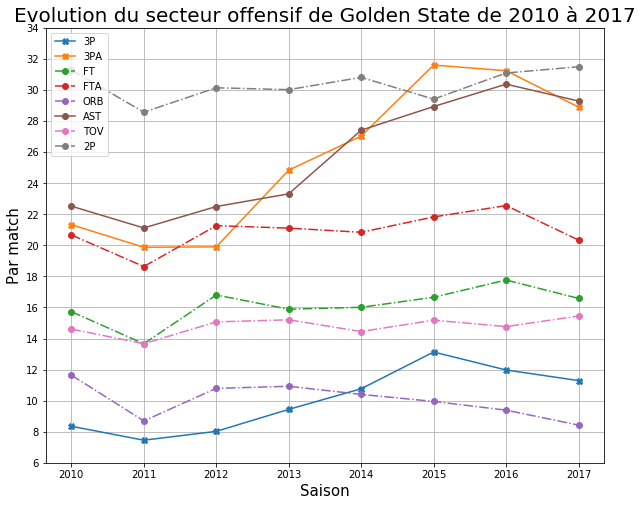

In [34]:
#Création de la table uniquement consacrée à Golden State

GoldenStats = mega_Stats.groupby('Tms').get_group('GSW') 
GoldenStats = GoldenStats.set_index('Season')
GoldenStats = GoldenStats.set_index([pd.Index([2010,2011,2012,2013,2014,2015,2016,2017,2018])])
GoldenStats = GoldenStats.drop(['Tm','Tms'], axis=1)

#On crée des stats 'par match'
GoldenStats = GoldenStats.iloc[[0,1,2,3,4,5,6,7]].astype('int')/82 
GoldenStats.iloc[1] = GoldenStats.iloc[1].astype('int')*82/66 
#Correction des stats 'par match' pour l'année 2011 :
#à cause du lock-out (grève des joueurs), seuls 66 matchs ont été joués

fig = plt.figure(figsize=(10,8))

ax1 = plt.subplot(1,1,1)
#On plotte sur le même graphe la plupart des caractéristiques de notre jeu de données
ax1 = plt.plot(GoldenStats['3P'], marker='X', linestyle ='solid', label='3P')
ax1 = plt.plot(GoldenStats['3PA'], marker='X', linestyle ='solid', label='3PA')
ax1 = plt.plot(GoldenStats['FT'], marker='o', linestyle ='-.', label='FT')
ax1 = plt.plot(GoldenStats['FTA'], marker='o', linestyle ='-.', label='FTA')
ax1 = plt.plot(GoldenStats['ORB'], marker='o', linestyle ='-.', label='ORB')
ax1 = plt.plot(GoldenStats['AST'], marker='o', linestyle ='solid', label='AST')
ax1 = plt.plot(GoldenStats['TOV'], marker='o', linestyle ='-.', label='TOV')
ax1 = plt.plot(GoldenStats['2P'], marker='o', linestyle ='-.', label='2P')

plt.grid('y')
plt.ylim([6,34])
plt.yticks(range(6,36,2))
plt.xlabel("Saison", fontsize = 15)
plt.ylabel("Par match", fontsize = 15)
plt.legend(loc='best')
plt.title("Evolution du secteur offensif de Golden State de 2010 à 2017", fontsize=20)
plt.show()

Il apparaît clairement que **le jeu de Golden State s'est transformé à partir de la saison 2013-2014**. L'équipe s'est tournée vers le "small ball", c'est à dire aligner sur le terrain 5 joueurs de petite taille, adroits, très mobiles et donc capables de bouger très vite le ballon et de se démarquer pour inscrire des tirs de loin. Ainsi, la formation (surnomée le "nuclear lineup" par Barack Obama) a développé un jeu collectif léché, et **résolument axé vers le tir à 3 points**. C'est ainsi que les statistiques de **tirs à 3 points tentés et réussis** ainsi que le **nombre de passes décisives** ont fortement augmenté. Dans le même temps, toutes les autres statistiques sont restées assez stables, à l'exception d'une **baisse du nombre de rebonds offensifs**, conséquence de la petite taille relative des joueurs sur le parquet.

### B. La construction d'une singularité

Dans les prochaines cellules, nous nous attellerons à démontrer que **le style de jeu des Warriors** (bien résumé par toutes les statistiques) **n'avait rien d'exceptionnel au début de la décennie 2010**, mais qu'il est devenu très **spécifique à partir de la saison 2014-2015**, en faisant une équipe hors du commun.

Pour ce faire, on utilise une **CAH** (classification ascendante hiérarchique), qui permet d'établir la "ressemblance" entre chacune des lignes (équipes) dans notre tableau (statistiques de la NBA en une saison donnée).

Les graphes suivant se lisent ainsi : plus les noeuds reliant 2 équipes (ou deux groupes d'équipes) sont bas, plus les données associées se ressemblent. Ainsi, **une équipe développant un jeu original aura des noeuds très hauts**, et réciproquement une équipe dont les caractéristiques de jeu sont dans la moyenne aura des noeuds proches des abscisses.

En observant la position des Warriors dans la CAH et le niveau de ses premiers noeuds saison après saison, on pourra donc juger de la différenciation ou non du jeu de l'équipe de la Baie. 

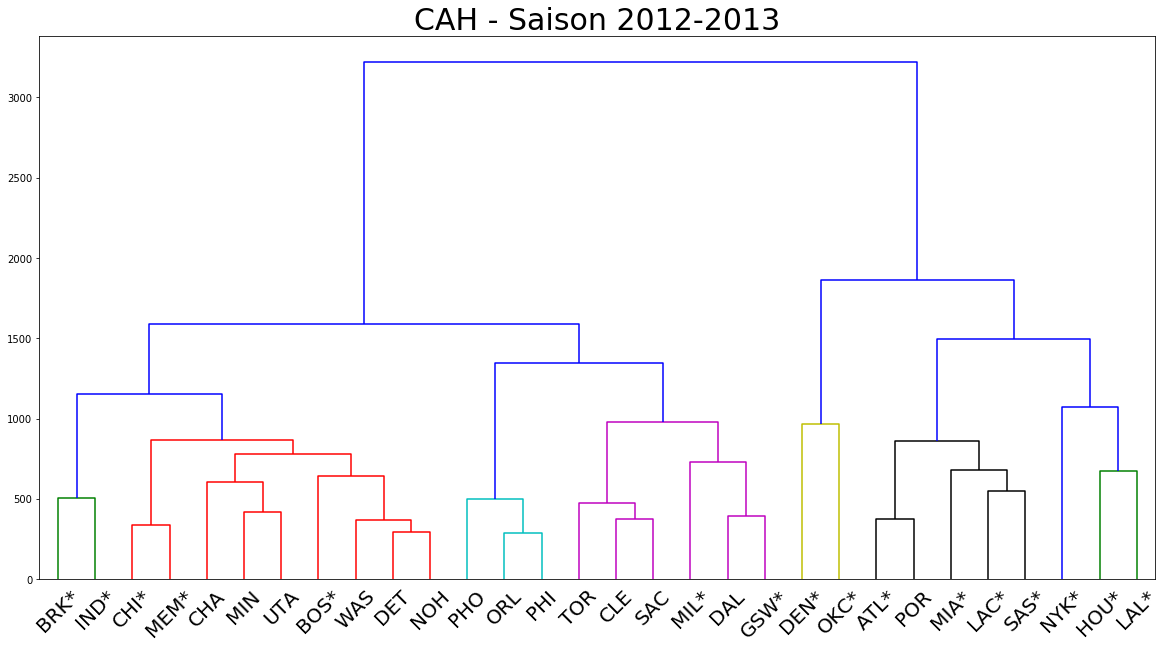

In [35]:
Z = linkage(stats2012,method='ward',metric='euclidean')

fig = plt.subplots(figsize=(20,10))
dendrogram(Z, labels=stats2012.index, orientation='top', color_threshold=1000, leaf_font_size=20) 
plt.title("CAH - Saison 2012-2013", fontsize=30)

plt.show()

Nous ne présentons ici que la CAH de la saison 2012-2013, afin de ne pas surcharger d'information le notebook. Il  illustre assez bien la position qu'occupe avant son premier titre en 2014-2015. 

Durant les trois premières saisons de notre étude, l'équipe de la baie de San Francisco **ne semble pas proposer un style de jeu bien différencié**. Elle se retrouve "statistiquement proche" d'équipes majoritairement absentes des playoffs (sans ' * ' : Dallas, Sacramento, Cleveland et Toronto en 2012-2013, par exemple), et ne dépasse pas les 47 victoires.

Par la suite Golden State va se créer sa différenciation en 2014-2015, puis atteindre le summum de l'unicité du style de jeu lors de sa saison record en 2015-2016.  

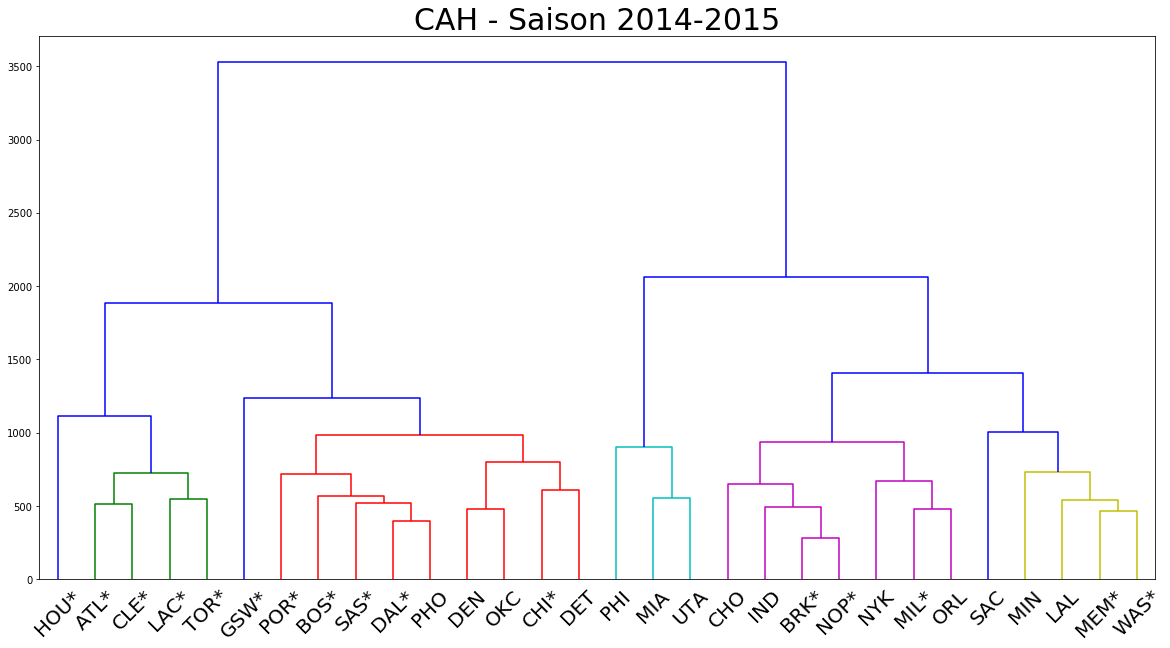

In [36]:
Z = linkage(stats2014,method='ward',metric='euclidean')

fig = plt.subplots(figsize=(20,10))
dendrogram(Z, labels=stats2014.index, orientation='top', color_threshold=1000, leaf_font_size=20) 
plt.title("CAH - Saison 2014-2015", fontsize=30)

plt.show()

La saison 2014-2015, première année du "règne" de 5 saisons que vont établir les Warriors sur la NBA, est le théâtre d'une **vraie différenciation** du jeu des Warriors, qui devient **l'équipe au style de jeu le plus unique dans la ligue**, et est seule dans sa grappe pour la première fois. 

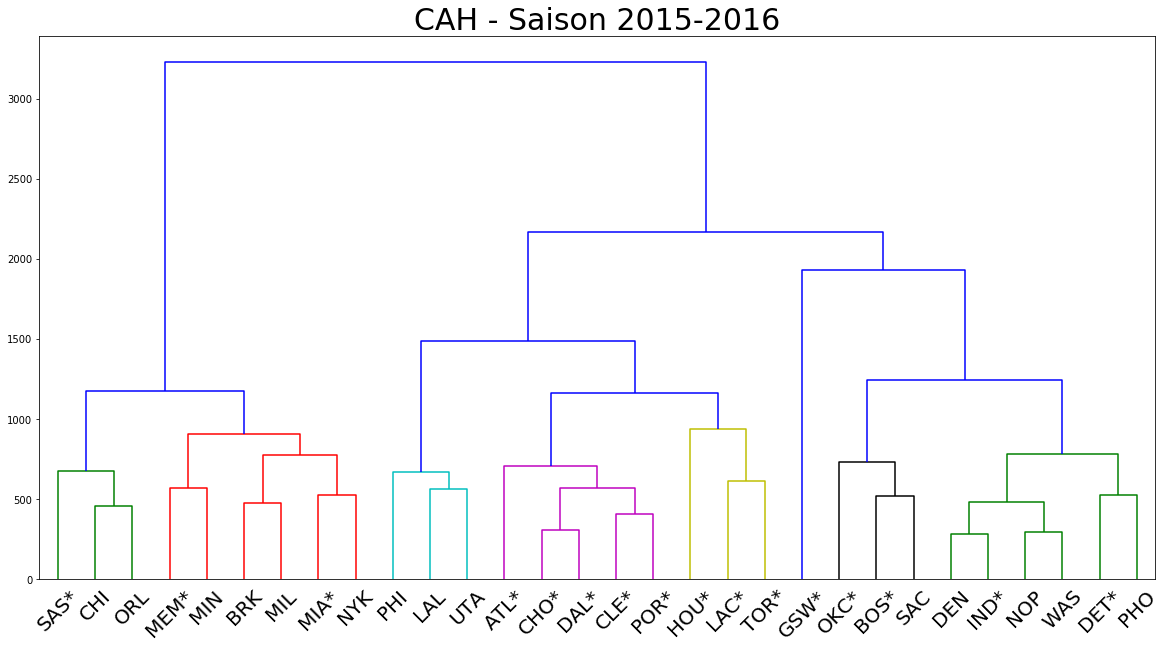

In [37]:
Z = linkage(stats2015,method='ward',metric='euclidean')

fig = plt.subplots(figsize=(20,10))
dendrogram(Z, labels=stats2015.index, orientation='top', color_threshold=1000, leaf_font_size=20) 
plt.title("CAH - Saison 2015-2016", fontsize=30)

plt.show()

Celle ci se confirme encore beaucoup plus nettement en 2015-2016, saison de tous les records pour Golden State. Leur jeu semble s'être fortement démarqué de celui de ses concurrentes, avec un premier noeud avoisinant les 2000 : presque 1,7 fois plus que l'équipe la plus originale depuis le début de notre étude ! 

Cette fois, c'est clair : les Golden State Warriors ont inventé une autre façon de jouer au basketball.

Concentrons-nous désormais sur **l'explication de cette singlarité** acquise lors des saisons 2014-2015 et 2015-2016, en observant la position relative des Warriors sur chacune des statistiques recensées. 

#### Une singularité construite autour des passes et du tir à longue distance

##### Saison 2014-2015

Afin de comprendre quelles variables affectent le plus la variance de notre jeu de données pour savoir lesquelles sont différenciantes et peuvent donc potentiellement expliquer le niveau d'originalité des GSW constaté par nos CAH, nous allons réaliser des Analyses en Composantes Principales.

En observant la position de Golden State Warriors sur le mapping des individus et en observant les caractéristiques associées à la position des Warriors, nous devrions trouver la clé de la différenciation du jeu des Warriors.

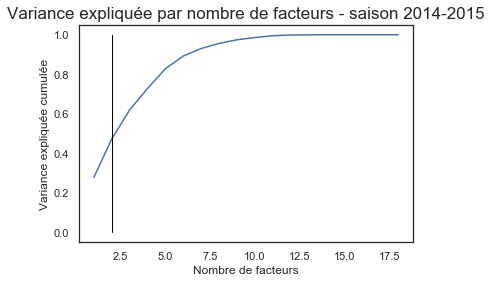

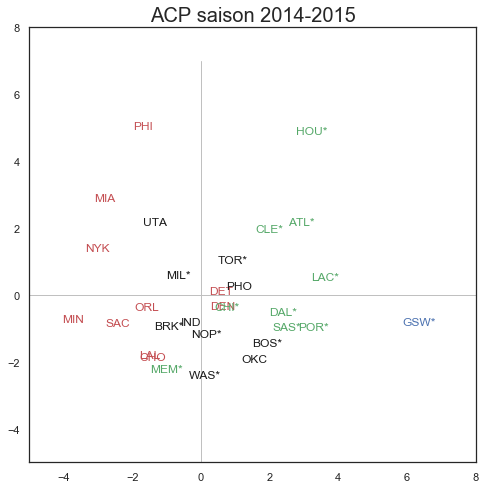

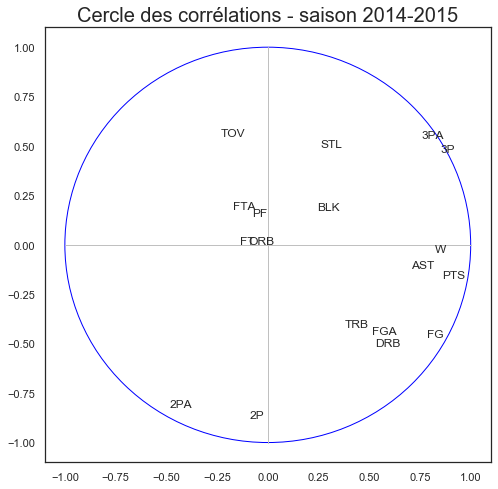

In [38]:
n = stats2014.shape[0]
p = stats2014.shape[1]
sc = StandardScaler()
Z2014 = sc.fit_transform(stats2014)       # Les données sont centrées et réduites

acp = PCA(svd_solver='full')

coord = acp.fit_transform(Z2014)          # On a les coordonnées des points dans l'ACP

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(stats2014)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

eigval = (n-1)/n*acp.explained_variance_

# Calcul de la variance expliquée en fonction du nombre d'axes principaux retenus
sns.set(style="white", palette="deep", color_codes=True)
plt.grid(b=None)
plt.plot(np.arange(1,p+1),np.cumsum(acp.explained_variance_ratio_)) 
plt.plot([2,2],[1,0],color='black',linestyle='-',linewidth=1)
plt.title("Variance expliquée par nombre de facteurs - saison 2014-2015", fontsize = 17)
plt.ylabel("Variance expliquée cumulée")
plt.xlabel("Nombre de facteurs")
plt.grid()
plt.show()

bs = 1/np.arange(p,0,-1)
bs = np.cumsum(bs)
bs = bs[::-1]

# On crée 3 groupes de couleur : un pour les 10 meilleurs bilans de la ligue, 
# un pour les 10 moins bons bilans, un pour les 10 bilans intermédiaires 
# et un pour les GSW

stats2014['Group']= stats2014['W']              

for i in range(0,30) :
    if int(stats2014['W'][i]) > stats2014['W'].astype(int).quantile(.66) :
        stats2014['Group'][i] = 2 
    else :
        if int(stats2014['W'][i]) > stats2014['W'].astype(int).quantile(.34) :
            stats2014['Group'][i] = 1
        else : 
            stats2014['Group'][i] = 0
    if stats2014['W'].index[i] == "GSW*" :
        stats2014['Group'][i] = 3

types2014 = stats2014['Group']
modalites2014 = np.unique(types2014)    
couleurs = ['r','k','g','b']

fig, axes = plt.subplots(figsize=(8,8)) 
axes.set_xlim(-5,8)
axes.set_ylim(-5,8)
sns.set(style="white", palette="deep", color_codes=True)
plt.grid(b=None)

for c in range(len(modalites2014)):
    numero = np.where(types2014 == modalites2014[c])
    for i in numero[0]: 
        plt.annotate(stats2014.index[i],(coord[i,0],coord[i,1]),color=couleurs[c])

plt.plot([-7,10],[0,0],color='silver',linestyle='-',linewidth=1) 
plt.plot([0,0],[-7,7],color='silver',linestyle='-',linewidth=1)
plt.title("ACP saison 2014-2015", fontsize = 20)
plt.grid()
plt.show()


# Création du cercle des corrélations

di = np.sum(Z2014**2,axis=1) 

cos2 = coord**2
for j in range(p):
    cos2[:,j] = cos2[:,j]/di 
    
sqrt_eigval = np.sqrt(eigval)

corvar = np.zeros((p,p))
for k in range(p):
    corvar[:,k] = acp.components_[k,:] * sqrt_eigval[k]
    
stats2014=stats2014.drop(["Group"], axis =1)

fig, axes = plt.subplots(figsize=(8,8))   
axes.set_xlim(-1.1,1.1)
axes.set_ylim(-1.1,1.1)
sns.set(style="white", palette="deep", color_codes=True)
plt.grid(b=None)

for j in range(p):
    plt.annotate(stats2014.columns[j],(corvar[j,0],corvar[j,1]))

plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1) 
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)
plt.title("Cercle des corrélations - saison 2014-2015", fontsize = 20)
plt.grid()
 
# Ajout d'un cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False) 
axes.add_artist(cercle)

plt.show()

Tout d'abord les deux axes de cette ACP expliquent près de 50% de la variance du jeu de données des statitisques de la saison 2014-2015. 

<font color=blue>**L'axe horizontal mesure ce qu'on pourrait appeler l'efficacité offensive** :</font> il est très correlé avec le **nombre de victoires**, de **points marqués**, de **3 points marqués et tentés** et de **passes décisives**. De plus, il n'est que très faiblement corrélé avec les contres, et plus globalement il ne met à l'honneur aucune mesure défensive. C'est donc logiquement que les Warriors se détachent très largement sur cet axe. Symétriquement, Minnesota et les New York Knicks présentent les deux plus faibles bilans de leurs conférences cette saison.    

Plus généralement, les meilleures équipes de la Ligue, colorées en vert, se détachent sur la droite de cet axe, ce qui tend à souligner la logique d'éfficacité offensive. De même, les équipes colorées en rouge, les moins bonnes de la ligue, se situent surtout dans la zone d'inneficience collective offensive.

<font color=blue>**L'axe vertical semble lui caractériser le centre de gravité d'une équipe**.</font> Il est très fortement corrélé avec le **nombre de tirs à 2 points réussis**, et dans une moindre mesure avec les **rebonds**. Ce sont des catégories dans lesquelles les équipes qui s'appuient beaucoup sur de grands joueurs intérieurs, tant par la taille que le talent. Inversement, l'autre coté de l'axe explique surtout les pertes de balles, les interceptions, et les tirs à 3 points. Ces secteurs de jeu sont majoritairement l'apanage des joueurs extérieurs, plus petits et qui touchent bien plus de ballons. 

Ainsi, les deux points extrêmes en haut, les Houston Rockets et les Philadelphie 76ers, shootent bien plus à 3 points (2680 et 2160) que la moyenne NBA (1836). A l'opposé, Washington et Memphis ont tiré 1381 et 1226 fois à 3 points cette année là. 

Vérifions à présent dans les données les hypothèses que nous avons faites sur la signification des axes, impliquant que les GSW se différencient avec les tirs à 3 points. 
Nous pouvons faire cela en plaçant les GSW sur des boxplots montrant les caractéristiques de jeu des différentes équipes chaque année.

On trace des croix noires pour marquer la position de Golden State Warriors dans les boxplot résumant les performances des équipes de la ligue pour les caractéristiques les plus importantes du jeu et pour l'année d'intérêt.

No handles with labels found to put in legend.


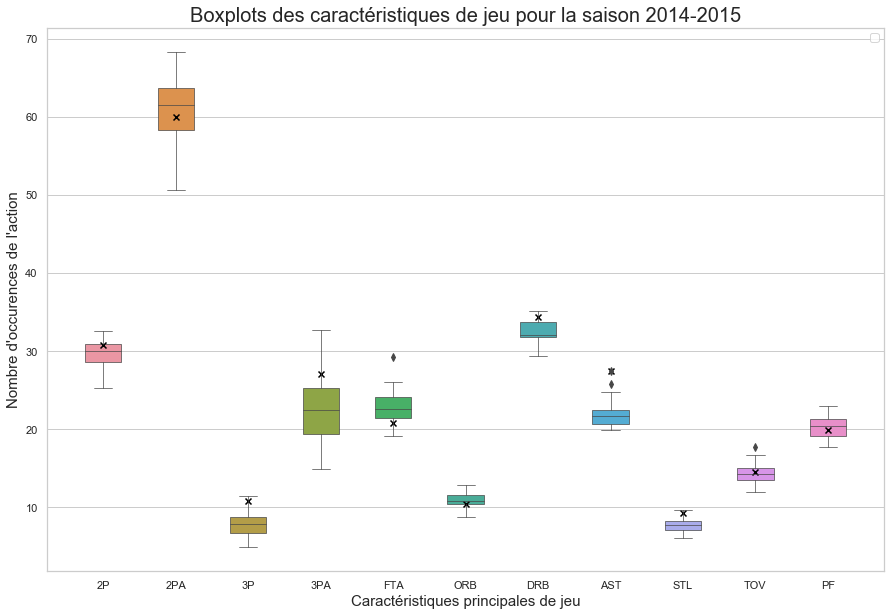

In [39]:
plt.figure(figsize=(15, 10))
sns.set_style("whitegrid")


stats2014_boxplot=stats2014.drop(["W","FG","FGA","FT","TRB","BLK","PTS"],axis=1).astype('float')/82

GoldenStats2014 = stats2014_.groupby('Tms').get_group('GSW') 
GoldenStats2014 = GoldenStats2014.drop(['Season','Win_Indic','Tm','Tms','W_x'], axis=1)

#On crée des stats 'par match'
GoldenStats2014 = GoldenStats2014.astype('int')/82 


#On trace les boxplots pour la saison 2014, sur les caractéristiques principales du jeu
ax=sns.boxplot(data = stats2014_boxplot, width=0.5, linewidth=0.7) 
plt.title("Boxplots des caractéristiques de jeu pour la saison 2014-2015", fontsize=20)
plt.ylabel("Nombre d'occurences de l'action", fontsize=15)
plt.xlabel("Caractéristiques principales de jeu", fontsize=15)

#Définition d'un vecteur trouvant les niveaux des stats des Golden States Warriors lors de la saison
Y = [GoldenStats2014.iloc[0,2],GoldenStats2014.iloc[0,3], GoldenStats2014.iloc[0,4],GoldenStats2014.iloc[0,5],GoldenStats2014.iloc[0,7],GoldenStats2014.iloc[0,8], GoldenStats2014.iloc[0,9],GoldenStats2014.iloc[0,11],GoldenStats2014.iloc[0,12], GoldenStats2014.iloc[0,14], GoldenStats2014.iloc[0,15]]

#On place les GSW:
plt.scatter(['2P','2PA','3P','3PA','FTA','ORB','DRB','AST','STL','TOV','PF'],Y, marker= 'x', c = 'black')
plt.legend(loc='best')

On le voit d'ores et déjà : <font color=blue>**dès la saison 2014-2015, le jeu des Warriors commence à se distinguer foncièrement de celui des autres équipes de la ligue**</font>, notamment en ce qui concerne les statistiques de tirs. Bien **en-deçà** de la moyenne NBA sur les **lancers-francs obtenus** et les **tirs à deux points tentés**, les Californiens compensent par un **niveau de trois points tentés très élevé** (top quartile), et **un nombre de 3 points et de passes décisives parmi les tout meilleurs de la ligue**. 

Défensivement, les Warriors se montrent **beaucoup moins agressifs avec le "small ball"**, ce qui amène à un **nombre de fautes commises un peu en-dessous de la médiane** et à une bonne statistique de **rebonds défensifs** : les Warriors défendent peu, donc subissent beaucoup de tirs, donc ont plus d'opportunités de prendre des rebonds défensifs que la moyenne de la ligue. Ainsi, le nombre de rebonds défensifs n'est pas - chez les Warriors - la caution d'une défense de fer.

Globalement, <font color=blue>**ce sont bien les statistiques de tirs et de passes décisives qui modèlent la spécificité du jeu des Warriors**</font>, dont le reste des statistiques ne prend globalement pas de valeurs aberrantes.

##### Saison 2015-2016

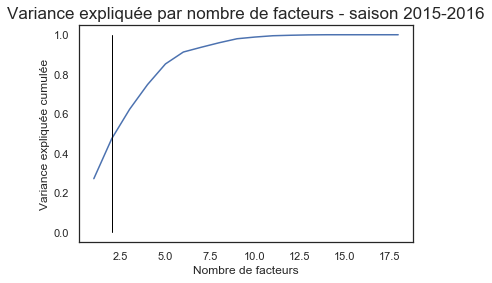

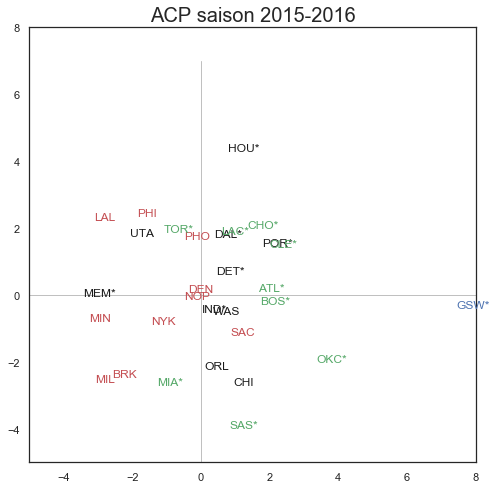

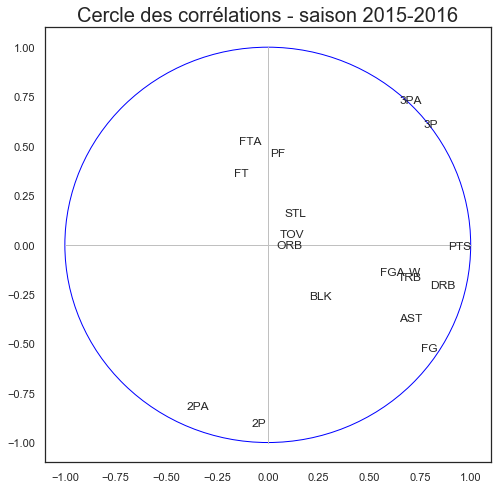

In [40]:
n = stats2015.shape[0]
p = stats2015.shape[1]
sc = StandardScaler()
Z2015 = sc.fit_transform(stats2015)       # Les données sont centrées et réduites

acp = PCA(svd_solver='full')

coord = acp.fit_transform(Z2015)          # On a les coordonnées des points dans l'ACP

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(stats2015)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

eigval = (n-1)/n*acp.explained_variance_

# Calcul de la variance expliquée en fonction du nombre d'axes principaux retenus
sns.set(style="white", palette="deep", color_codes=True)
plt.grid(b=None)

plt.plot(np.arange(1,p+1),np.cumsum(acp.explained_variance_ratio_)) 
plt.plot([2,2],[1,0],color='black',linestyle='-',linewidth=1)
plt.title("Variance expliquée par nombre de facteurs - saison 2015-2016", fontsize = 17)
plt.ylabel("Variance expliquée cumulée")
plt.xlabel("Nombre de facteurs")
plt.grid()
plt.show()

bs = 1/np.arange(p,0,-1)
bs = np.cumsum(bs)
bs = bs[::-1]

# On crée 3 groupes de couleur : un pour les 10 meilleurs bilans de la ligue, 
# un pour les 10 moins bons bilans, un pour les 10 bilans intermédiaires 
# et un pour les GSW

stats2015['Group']= stats2015['W']              

for i in range(0,30) :
    if int(stats2015['W'][i]) > stats2015['W'].astype(int).quantile(.66) :
        stats2015['Group'][i] = 2 
    else :
        if int(stats2015['W'][i]) > stats2015['W'].astype(int).quantile(.34) :
            stats2015['Group'][i] = 1
        else : 
            stats2015['Group'][i] = 0
    if stats2015['W'].index[i] == "GSW*" :
        stats2015['Group'][i] = 3

types2015 = stats2015['Group']
modalites2015 = np.unique(types2015)    
couleurs = ['r','k','g','b']

fig, axes = plt.subplots(figsize=(8,8)) 
axes.set_xlim(-5,8)
axes.set_ylim(-5,8)
sns.set(style="white", palette="deep", color_codes=True)
plt.grid(b=None)

for c in range(len(modalites2015)):
    numero = np.where(types2015 == modalites2015[c])
    for i in numero[0]: 
        plt.annotate(stats2015.index[i],(coord[i,0],coord[i,1]),color=couleurs[c])

plt.plot([-7,10],[0,0],color='silver',linestyle='-',linewidth=1) 
plt.plot([0,0],[-7,7],color='silver',linestyle='-',linewidth=1)
plt.title("ACP saison 2015-2016", fontsize = 20)
plt.grid()
plt.show()

# Création du cercle des corrélations

di = np.sum(Z2015**2,axis=1) 

cos2 = coord**2
for j in range(p):
    cos2[:,j] = cos2[:,j]/di 
    
sqrt_eigval = np.sqrt(eigval)

corvar = np.zeros((p,p))
for k in range(p):
    corvar[:,k] = acp.components_[k,:] * sqrt_eigval[k]
    
stats2015=stats2015.drop(["Group"], axis =1)


fig, axes = plt.subplots(figsize=(8,8))   
axes.set_xlim(-1.1,1.1)
axes.set_ylim(-1.1,1.1)
sns.set(style="white", palette="deep", color_codes=True)
plt.grid(b=None)

for j in range(p):
    plt.annotate(stats2015.columns[j],(corvar[j,0],corvar[j,1]))

plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1) 
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)
plt.title("Cercle des corrélations - saison 2015-2016", fontsize = 20)
plt.grid()
 
# Ajout d'un cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False) 
axes.add_artist(cercle)

plt.show()

<font color=blue>**L'axe principal consacre "la puissance de feu d'une équipe"**</font>, dans la mesure où il explique particulièrement les **points**, les **tirs à 3 points pris**, le **nombre total de shoots rentrés** et les **passes décisives**. Il met plus qu'à l'honneur la franchise de Golden State, qui se détache très nettement, et dans une moindre mesure OKC, qui sont les deux seules à avoir dépassé les 9000 points cette saison. A l'opposé se situent des équipes telles que les Lakers, les Grizzlies de Memphis, les Bucks de Milwaukee et les Wolves de Minnesota. Elles ont toutes présentées de faibles bilans en NBA (exception faite de Memphis) avec des difficultés majeures en attaque, sutout au niveau du pourcentage d'adresse. 

**La saison 2015-2016 a donc rendu critique l'importance des points marqués**, qui se sont légèrement **décorrélés du nombre de victoires**. On a ainsi assisté à de véritables feux d'artifices avec des scores fleuves, où le fait de scorer énormément ne garantissait plus la victoire car les attaques avaient pris le pas sur la défense.  

<font color=blue>**L'axe vertical lui mesure toujours le "centre de gravité d'une équipe"**</font>, comme détaillé sur l'ACP de la saison précédente. 

En résumé, en transformant son approche du jeu, bien plus **porté vers le tir de loin**, les Warriors ont acquis un **avantage concurrentiel sans équivalent**. La saison 2015-2016 a été le théatre d'une écrasante domination de Golden State (impression visuellement confirmée sur les CAH et ACP de cette saison), avec à la clef un record historique de 73 victoires en NBA.  

**Dès lors, les autres équipes ont du s'adapter à cette nouvelle philosophie.** La plupart ont eu pour ambition de **copier ce style** si prolifique et spectaculaire. On a ainsi pu observer une **réelle révolution du basket en NBA**, consécutive au tremblement de terre provoqué par le "Nuclear Lineup" de Golden State.  

No handles with labels found to put in legend.


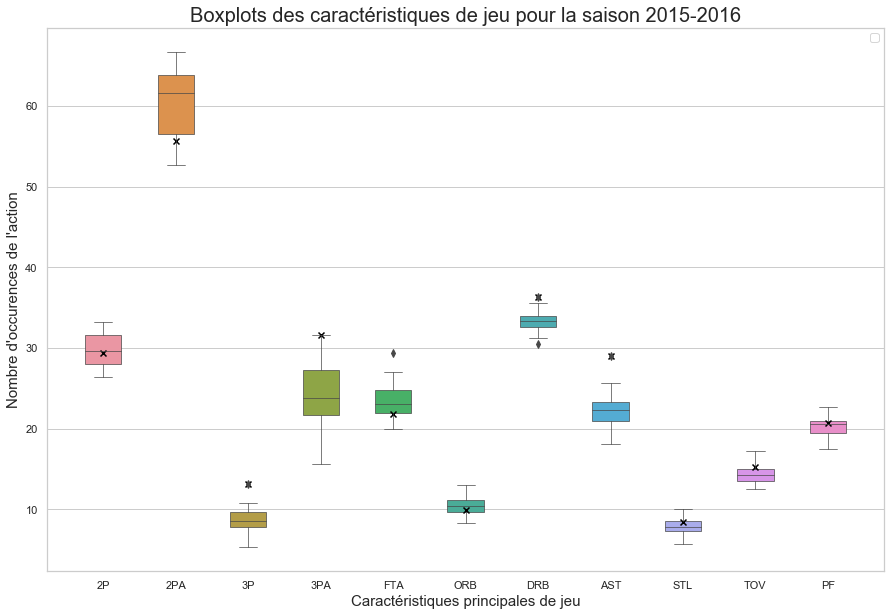

In [41]:
plt.figure(figsize=(15, 10))
sns.set_style("whitegrid")


stats2015_boxplot=stats2015.drop(["W","FG","FGA","FT","TRB","BLK","PTS"],axis=1).astype('float')/82

GoldenStats2015 = stats2015_.groupby('Tms').get_group('GSW') 
GoldenStats2015 = GoldenStats2015.drop(['Season','Win_Indic','Tm','Tms','W_x'], axis=1)
GoldenStats2015 = GoldenStats2015.astype('int')/82 


ax=sns.boxplot(data = stats2015_boxplot, width=0.5, linewidth=0.7) 
plt.title("Boxplots des caractéristiques de jeu pour la saison 2015-2016", fontsize=20)
plt.ylabel("Nombre d'occurences de l'action", fontsize=15)
plt.xlabel("Caractéristiques principales de jeu", fontsize=15)


Y = [GoldenStats2015.iloc[0,2],GoldenStats2015.iloc[0,3], GoldenStats2015.iloc[0,4],GoldenStats2015.iloc[0,5],GoldenStats2015.iloc[0,7],GoldenStats2015.iloc[0,8], GoldenStats2015.iloc[0,9],GoldenStats2015.iloc[0,11],GoldenStats2015.iloc[0,12], GoldenStats2015.iloc[0,14], GoldenStats2015.iloc[0,15]]

#On place les GSW:
plt.scatter(['2P','2PA','3P','3PA','FTA','ORB','DRB','AST','STL','TOV','PF'],Y, marker= 'x', c = 'black')
plt.legend(loc='best')

En 2015-2016, lors de la **saison de tous les records** pour les Warriors, les tendances de 2015 sont encore exacerbées : les Warriors deviennent **l'équipe qui tente et réussit le plus à 3 points dans la ligue** et domine aussi nettement le classement des **passes décisives**.

**Sur les autres statistiques**, pour autant, à part les rebonds défensifs (jouer en "small ball" fait subir beaucoup de tirs et offre plus d'opportunités de rebonds défensifs (et offensifs pour les adversaires)) et les deux points tentés (qui sont directement corrélés au nombre de 3 points tentés car chaque 3 point tenté sacrifie une tentative à 2 points, et réciproquement), **les Warriors ne semblent absolument pas sortir du lot.**

<font color=blue>**La singularité extrême du jeu des Warriors démontrée par les CAH est donc principalement liée à leur approche du tir, en délaissant les 2 points et lancers pour les 3 points.**</font>

L'évolution des ACP présuppose que les jeux de données des autres équipes de la ligue ont évolué. Reste à déterminer si, comme le pense Curtis Harris, les Warriors ont eu un impact dans ces changements vers un basket plus offensif.

## III. La révolution de la NBA en réaction : le "Warriors Effect"

### A. L'essor du tir à 3 points : pivot de la révolution dans le jeu en NBA 

#### a) La révolution dans le jeu en NBA : statistiques descriptives

Avant toutes choses, observons l'évolution de la moyenne de chacune des statistiques étudiées. Pour des raisons de lisibilité, nous divisons en 3 graphes cette étude.

In [42]:
A=stats2010.astype(int).mean()/82           # Division par 82 pour faire la moyenne par match 
B=stats2011.astype(int).mean()/66           # Saison de "lock-out" (grève), seulement 66 matchs
C=stats2012.astype(int).mean()/82
D=stats2013.astype(int).mean()/82
E=stats2014.astype(int).mean()/82
F=stats2015.astype(int).mean()/82
G=stats2016.astype(int).mean()/82
H=stats2017.astype(int).mean()/82
I=stats2018.astype(int).mean()/82

Stats_Moy = pd.DataFrame((A,B,C,D,E,F,G,H,I), index = range(2010,2019)) 
Stats_Moy = Stats_Moy.drop(['W'], axis=1)

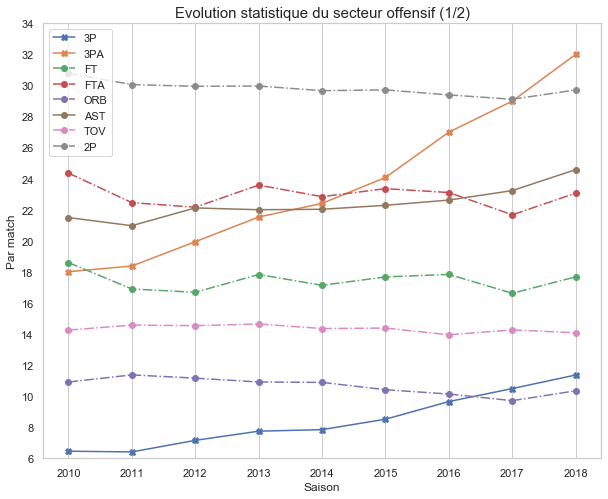

In [43]:
fig = plt.figure(figsize=(10,8))
ax1 = plt.subplot(1,1,1)
#On trace sur un même graphe l'évolution de la moyenne par saison de certaines statistiques offensives
ax1 = plt.plot(Stats_Moy['3P'], marker='X', linestyle ='solid', label='3P')
ax1 = plt.plot(Stats_Moy['3PA'], marker='X', linestyle ='solid', label='3PA')
ax1 = plt.plot(Stats_Moy['FT'], marker='o', linestyle ='-.', label='FT')
ax1 = plt.plot(Stats_Moy['FTA'], marker='o', linestyle ='-.', label='FTA')
ax1 = plt.plot(Stats_Moy['ORB'], marker='o', linestyle ='-.', label='ORB')
ax1 = plt.plot(Stats_Moy['AST'], marker='o', linestyle ='solid', label='AST')
ax1 = plt.plot(Stats_Moy['TOV'], marker='o', linestyle ='-.', label='TOV')
ax1 = plt.plot(Stats_Moy['2P'], marker='o', linestyle ='-.', label='2P')

plt.grid(axis='y')
plt.ylim([6,34])
plt.xticks(range(2010,2019))
plt.yticks(range(6,36,2))
plt.xlabel("Saison")
plt.ylabel("Par match")
plt.legend(loc='best')
plt.title("Evolution statistique du secteur offensif (1/2)", fontsize=15)
plt.show()

On observait déja une tendance à l'utilisation plus prononcée de l'arme 3 points avant l'explosion au haut niveau des Warriors. Toutefois, **après la saison 2014, les 3 points tentés ont connu une tendance encore plus ascendante**, entrainant logiquement **un plus grand nombre de réussites à longue distance**. De plus, les **passes décisives** ont également augmenté après cette saison, confirmant l'imitation du jeu qui a fait la réussite de la franchise californienne : **les trois statistiques sur lesquelles les Warriors se démarquaient se mettent à croitre plus rapidement qu'avant à l'échelle de la ligue après leur premier titre**.

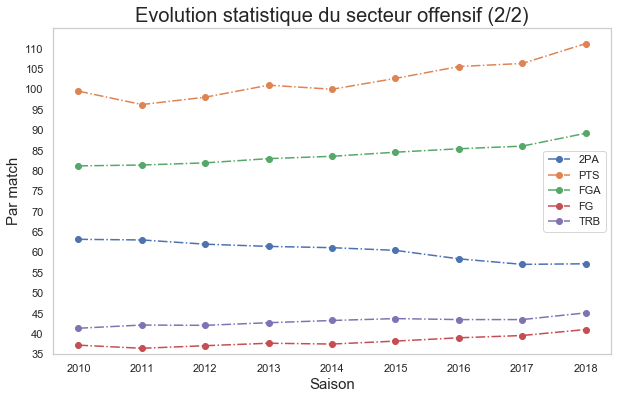

In [44]:
fig = plt.figure(figsize=(10,6))
ax1 = plt.subplot(1,1,1)

ax1 = plt.plot(Stats_Moy['2PA'], marker='o', linestyle ='-.', label='2PA')
ax1 = plt.plot(Stats_Moy['PTS'], marker='o', linestyle ='-.', label='PTS')
ax1 = plt.plot(Stats_Moy['FGA'], marker='o', linestyle ='-.', label='FGA')
ax1 = plt.plot(Stats_Moy['FG'], marker='o', linestyle ='-.', label='FG')
ax1 = plt.plot(Stats_Moy['TRB'], marker='o', linestyle ='-.', label='TRB')

plt.grid()
plt.ylim([35,115])
plt.xticks(range(2010,2019))
plt.yticks(range(35,115,5))
plt.xlabel("Saison", fontsize=15)
plt.ylabel("Par match",fontsize=15)
plt.legend(loc='right')
plt.title("Evolution statistique du secteur offensif (2/2)", fontsize=20)
plt.show()

Le **secteur offensif** a donc muté, avec un plus grands nombres de tirs pris, dont moins de tentatives à 2 points mais plus à 3 points. Combiné avec le système offensif de "run and gun" et de "small ball" des Warriors, copié par la ligue ensuite, cela a entrainé une explosion du total de points scorés (+10% entre 2014-2015 et 2018-2019).


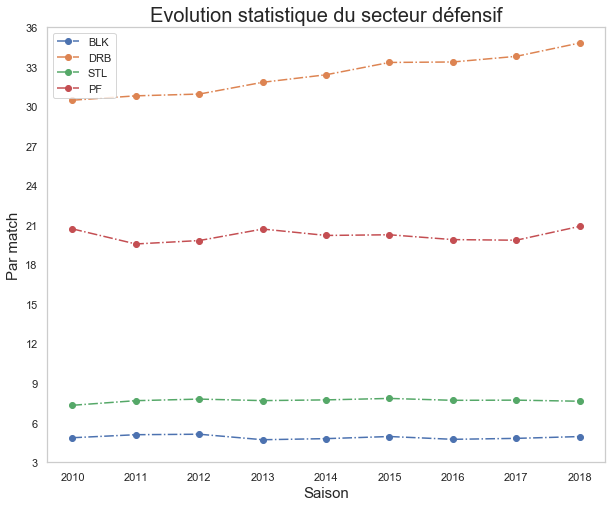

In [45]:
fig = plt.figure(figsize=(10,8))
ax1 = plt.subplot(1,1,1)

ax1 = plt.plot(Stats_Moy['BLK'], marker='o', linestyle ='-.', label='BLK')
ax1 = plt.plot(Stats_Moy['DRB'], marker='o', linestyle ='-.', label='DRB')
ax1 = plt.plot(Stats_Moy['STL'], marker='o', linestyle ='-.', label='STL')
ax1 = plt.plot(Stats_Moy['PF'], marker='o', linestyle ='-.', label='PF')

plt.grid()
plt.ylim([3,36])
plt.xticks(range(2010,2019))
plt.yticks(range(3,37,3))
plt.xlabel("Saison", fontsize = 15)
plt.ylabel("Par match", fontsize = 15)
plt.legend(loc='best')
plt.title("Evolution statistique du secteur défensif", fontsize=20)
plt.show()

Dans le même temps, on constate que les **statistiques défensives** n'ont que peu évolué, mis à part le **nombre de rebonds défensifs**. Cette tendance s'explique logiquement par l'augmentation moyenne du nombre de tirs pris par les adversaires, et donc mécaniquement du nombre d'échecs à récuperer sous son propre panier. De plus, les équipes délaissant les tirs à 2 points pour ceux derrière l'arc sont moins présentes dans la raquette (en configuration small ball), voire plus petites en taille pour privilégier la mobilité et l'adresse, et abandonnent donc plus le secteur des rebonds offensifs (comme en témoigne la baisse du nombre de rebonds offensifs malgré la hausse du nombre de tirs ratés)  

On constate donc bien, à l'échelle de la ligue :
- Une **augmentation du nombre de 3 points tentés et réussis**
- Une **augmentation du nombre de passes décisives**
- Une **augmentation significative du nombre de points par matchs**
- Une **hausse du nombre de rebonds défensifs** combinée à une **baisse du nombre de rebonds offensifs**, traduisant une plus faible présence des équipes attaquantes dans la raquette adverse, et potentiellement le recours à des joueurs plus petits, spécialistes des 3 points et incapables de prendre les rebonds.

En conséquence, on peut conclure que la révolution qui a sécoué la ligue a mis en valeur l'adresse à longue distance et le collectif, sans provoquer de changement dans la stratégie défensive. **C'est donc une transfomation résolument offensive**.

Quant au rôle des Warriors dans cette révolution, il semble important dans la mesure où :
- les changements observés à l'échelle de la ligue se retrouvent pratiquement tous dans le jeu des Warriors
- les Warriors ont été précurseurs dans l'évolution du nombre de 3 points tentés et réussis, avec une croissance très soutenue dès la saison 2012-2013.
- les Warriors ont été précurseurs dans l'évolution du nombre de passes décisives, avec une évolution dès la saison 2014-2015, alors qu'il a fallu attendre 2016-2017 pour voir ces statistiques croitre en moyenne à l'échelle de la ligue.
- la transformation résolument offensive des Warriors semble s'être diffusée à toute la ligue.

Toutefois, l'évolution la plus marquante reste celle du nombre de 3 points tentés et réussis, qui explose littéralement en dix ans. 

#### b) Le pivot de cette révolution : les 3 points tentés et réussis

Nous intuitons de la sous-partie précédente que si révolution il y a eu, elle se base sur l'évolution du nombre de 3 points.

Nous nous apprêtons à utiliser ici la **méthode des k-means**, afin de déterminer si les 3 points tentés et réussis peuvent bien être les pivots de cette révolution.
Si oui, nous devrions observer :  
<ol>
<li>Que dans l'axe 3 points, 3 points tentés, les points appartenant au groupe de chaque k-moyenne soient proches les uns des autres, et, donc,</li>  
<li>Que la classification de la méthode des k-means sur tout le jeu de données et uniquement sur les variables 3 points et 3 points tentés soient très similaires </li>
</ol>  
NB : pour autant, observer les éléments ci-dessus n'implique pas nécessairement que les tirs à 3 points constituent le coeur de l'évolution du jeu des franchises NBA sur la période, c'est simplement un indice ! A contrario, observer une totale déconnexion entre les deux clusterisations pourrait nous alerter sur le fait que les 3 points tentés et réussis n'ont pas eu un rôle crucial dans la catégorisation des styles de jeu de la ligue.

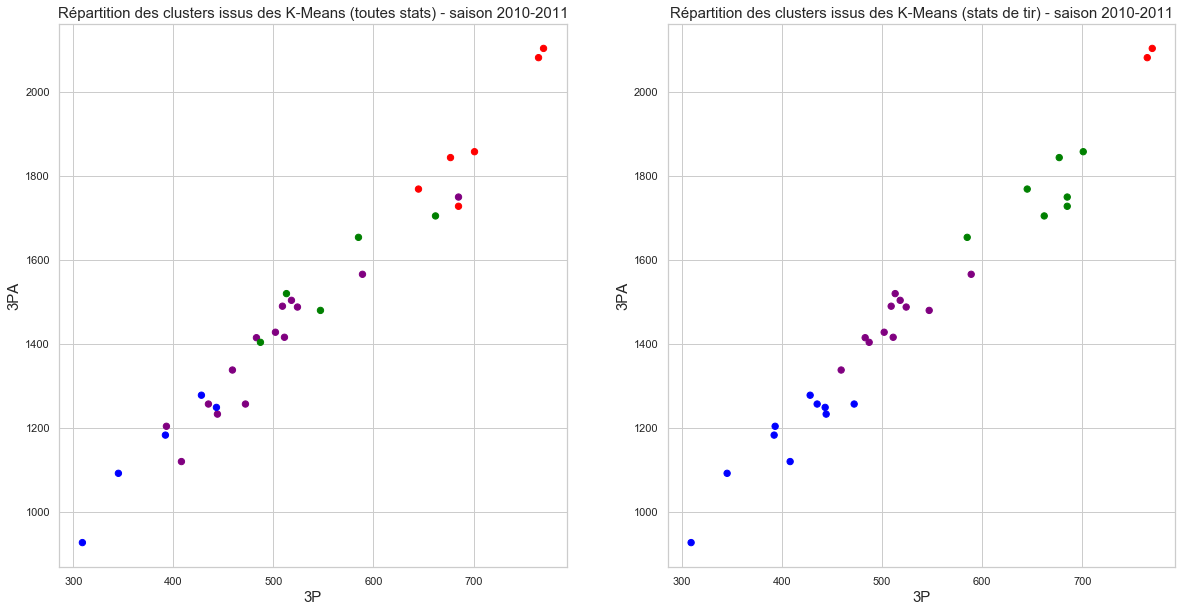

In [46]:
x=stats2010_.dropna()[['AST','2PA','2P','3PA','3P','BLK','PF','DRB','ORB','STL','FTA','TOV']] #On prend toutes les stats brutes

model=KMeans(n_clusters=4) #Création de 4 groupes...
model.fit(x.astype(float)) #qui divisent notre jeu de données autour de 4 moyennes.

#On réitère le procédé uniquement sur les trois points tentés et réussis
X=stats2010_.dropna()[['3PA','3P']] 

modelX=KMeans(n_clusters=4)
modelX.fit(X.astype(float))

fig, axs = plt.subplots(1, 2, figsize=(20,10))

colormap=np.array(['purple','green','blue','red'])
#On plotte les deux graphes à côté l'un de l'autre.
axs[0].set_xlabel('3P', fontsize = 15)
axs[0].set_ylabel('3PA', fontsize = 15)
axs[0].set_title("Répartition des clusters issus des K-Means (toutes stats) - saison 2010-2011", fontsize = 15)
axs[0].scatter(stats2010_.dropna()['3P'].astype(float), stats2010_.dropna()['3PA'].astype(float),c=colormap[model.labels_],s=40)

axs[1].set_xlabel('3P', fontsize = 15)
axs[1].set_ylabel('3PA', fontsize = 15)
axs[1].set_title("Répartition des clusters issus des K-Means (stats de tir) - saison 2010-2011", fontsize = 15)
axs[1].scatter(stats2010_.dropna()['3P'].astype(float), stats2010_.dropna()['3PA'].astype(float),c=colormap[modelX.labels_],s=40)


On constate un certain nombre de différences entre le clustering général et le clustering restreint aux variables de 3 points réussis et tentés, ce qui laisse entendre que les axes 3P, 3PA ne sont pas optimaux pour catégoriser les franchises en 2010-2011

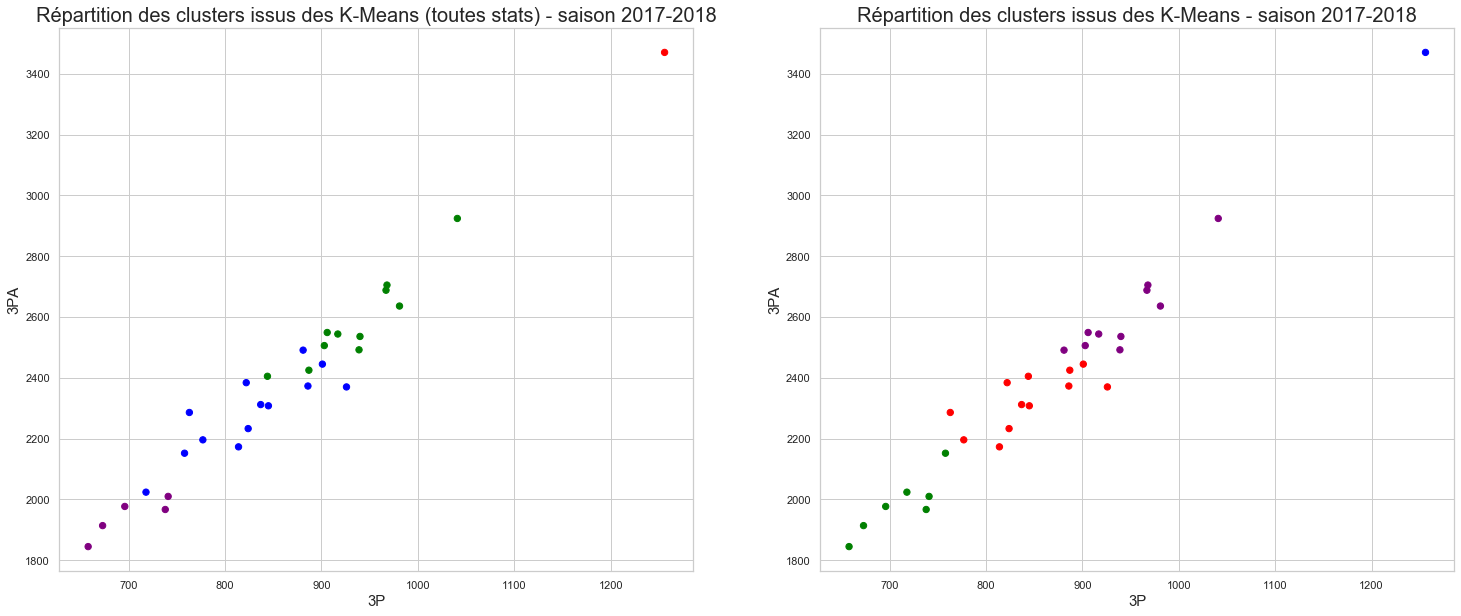

In [47]:
#même chose que la cellule d'au-dessus, mais en 2017

x=stats2017_.dropna()[['AST','2PA','2P','3PA','3P','BLK','PF','DRB','ORB','STL','FTA','TOV']]

model=KMeans(n_clusters=4)
model.fit(x.astype(float))

X=stats2017_.dropna()[['3PA','3P']]

modelX=KMeans(n_clusters=4)
modelX.fit(X.astype(float))

fig, axs = plt.subplots(1, 2, figsize=(25,10))

colormap=np.array(['purple','green','blue','red'])

acolormap=np.array(['purple','green','blue','red'])
#On plotte les deux graphes à côté l'un de l'autre.
axs[0].set_xlabel('3P', fontsize = 15)
axs[0].set_ylabel('3PA', fontsize = 15)
axs[0].set_title("Répartition des clusters issus des K-Means (toutes stats) - saison 2017-2018", fontsize = 20)
axs[0].scatter(stats2017_.dropna()['3P'].astype(float), stats2017_.dropna()['3PA'].astype(float),c=colormap[model.labels_],s=40)

axs[1].set_xlabel('3P', fontsize = 15)
axs[1].set_ylabel('3PA', fontsize = 15)
axs[1].set_title("Répartition des clusters issus des K-Means - saison 2017-2018", fontsize = 20)
axs[1].scatter(stats2017_.dropna()['3P'].astype(float), stats2017_.dropna()['3PA'].astype(float),c=colormap[modelX.labels_],s=40)

En 2017, avec 90% des points classés dans le même groupe entre les deux clusterings, on remarque que les deux catégorisations sont très proches.

Catégoriser les équipes en 4 groupes au vu de tout le jeu de données reviendrait alors pratiquement au même que catégoriser les équipes en 4 groupes uniquement au vu de leurs tirs derrière l'arc. Cela montrerait alors bien que **les styles de jeu sont structurés aujourd'hui autour des 3 points**, entre des **équipes qui tirent très peu** (6 équipes en bas à gauche du cadran), et des **équipes qui tirent énormément**, à l'image de Houston, seule en haut à droite du cadran.

De ce choix de tirer à 3 points ou non découle l'explication d'une grande partie des différences dans les niveaux des autres statistiques. 

*Reste pour autant à savoir si les 3 points sont la recette du succès...*

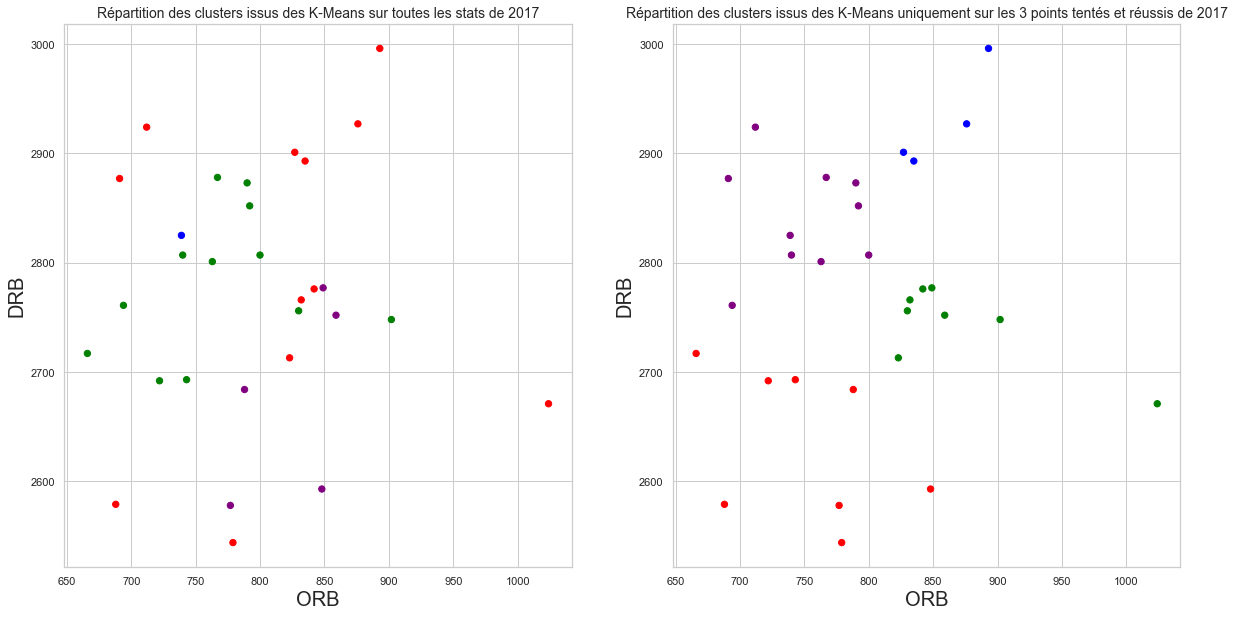

In [48]:
#même chose que la cellule d'au-dessus, mais en comparant avec les clusters sur les rebonds
x=stats2017_.dropna()[['AST','2PA','2P','3PA','3P','BLK','PF','DRB','ORB','STL','FTA','TOV']]

model=KMeans(n_clusters=4)
model.fit(x.astype(float))

X=stats2017_.dropna()[['ORB','DRB']]

modelX=KMeans(n_clusters=4)
modelX.fit(X.astype(float))

fig, axs = plt.subplots(1, 2, figsize=(20,10))

colormap=np.array(['purple','green','blue','red'])

axs[0].set_xlabel('ORB', fontsize = 20)
axs[0].set_ylabel('DRB', fontsize = 20)
axs[0].set_title("Répartition des clusters issus des K-Means sur toutes les stats de 2017", fontsize = 14)
axs[0].scatter(stats2017_.dropna()['ORB'].astype(float), stats2017_.dropna()['DRB'].astype(float),c=colormap[model.labels_],s=40)

axs[1].set_xlabel('ORB', fontsize = 20)
axs[1].set_ylabel('DRB', fontsize = 20)
axs[1].set_title("Répartition des clusters issus des K-Means uniquement sur les 3 points tentés et réussis de 2017", fontsize = 14 )
axs[1].scatter(stats2017_.dropna()['ORB'].astype(float), stats2017_.dropna()['DRB'].astype(float),c=colormap[modelX.labels_],s=40)

En réitérant le procédé sur les rebonds, on voit bien a contrario que les groupes issus des K-Means associé au jeu de données entier n'ont pas grand chose en commun avec ceux associés au jeu de données restreints aux rebonds, ce qui montre que **les rebonds ne sont pas structurants dans l'explication des différences de styles de jeu des équipes**.

#### c) Une convergence généralisée des styles de jeu

Pour se rendre compte de l'ampleur de la révolution qui a secoué la Ligue, une comparaison entre les ACP des saisons 2010-2011 et 2016-2017 semble nécessaire.

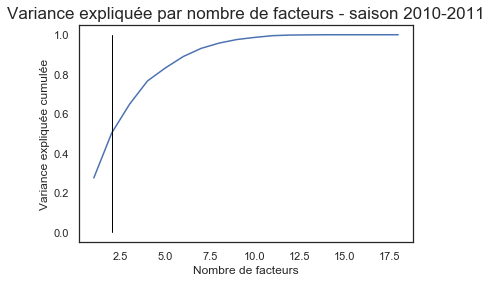

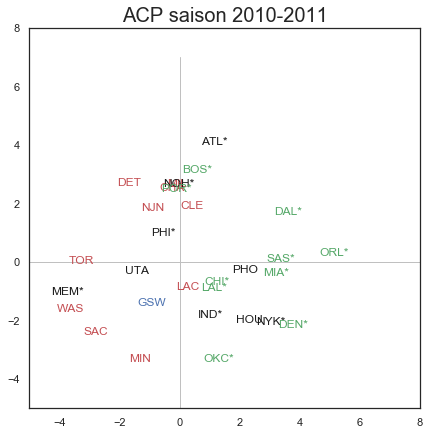

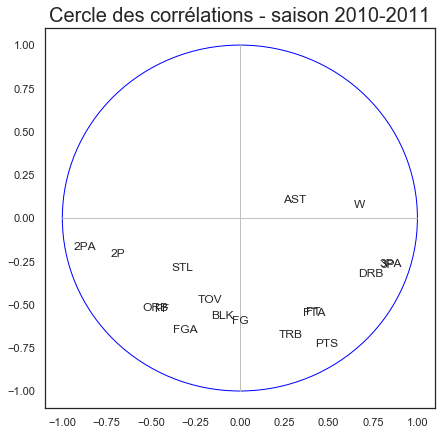

In [49]:
n = stats2010.shape[0]
p = stats2010.shape[1]
sc = StandardScaler()
Z2010 = sc.fit_transform(stats2010)       # Les données sont centrées et réduites

acp = PCA(svd_solver='full')

coord = acp.fit_transform(Z2010)          # On a les coordonnées des points dans l'ACP

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(stats2010)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

eigval = (n-1)/n*acp.explained_variance_

# Calcul de la variance expliquée en fonction du nombre d'axes principaux retenus
sns.set(style="white", palette="deep", color_codes=True)
plt.grid(b=None)

plt.plot(np.arange(1,p+1),np.cumsum(acp.explained_variance_ratio_)) 
plt.plot([2,2],[1,0],color='black',linestyle='-',linewidth=1)
plt.title("Variance expliquée par nombre de facteurs - saison 2010-2011", fontsize = 17)
plt.ylabel("Variance expliquée cumulée")
plt.xlabel("Nombre de facteurs")
plt.grid()
plt.show()

bs = 1/np.arange(p,0,-1)
bs = np.cumsum(bs)
bs = bs[::-1]

# On crée 3 groupes de couleur : un pour les 10 meilleurs bilans de la ligue, 
# un pour les 10 moins bons bilans, un pour les 10 bilans intermédiaires 
# et un pour les GSW

stats2010['Group']= stats2010['W']              

for i in range(0,30) :
    if int(stats2010['W'][i]) > stats2010['W'].astype(int).quantile(.66) :
        stats2010['Group'][i] = 2 
    else :
        if int(stats2010['W'][i]) > stats2010['W'].astype(int).quantile(.34) :
            stats2010['Group'][i] = 1
        else : 
            stats2010['Group'][i] = 0
    if stats2010['W'].index[i] == "GSW" :
        stats2010['Group'][i] = 3

types2010 = stats2010['Group']
modalites2010 = np.unique(types2015)    
couleurs = ['r','k','g','b']

fig, axes = plt.subplots(figsize=(7,7)) 
axes.set_xlim(-5,8)
axes.set_ylim(-5,8)
sns.set(style="white", palette="deep", color_codes=True)
plt.grid(b=None)

for c in range(len(modalites2010)):
    numero = np.where(types2010 == modalites2010[c])
    for i in numero[0]: 
        plt.annotate(stats2010.index[i],(coord[i,0],coord[i,1]),color=couleurs[c])

plt.plot([-7,10],[0,0],color='silver',linestyle='-',linewidth=1) 
plt.plot([0,0],[-7,7],color='silver',linestyle='-',linewidth=1)
plt.title("ACP saison 2010-2011", fontsize = 20)
plt.grid()
plt.show()

# Création du cercle des corrélations

di = np.sum(Z2010**2,axis=1) 

cos2 = coord**2
for j in range(p):
    cos2[:,j] = cos2[:,j]/di 
    
sqrt_eigval = np.sqrt(eigval)

corvar = np.zeros((p,p))
for k in range(p):
    corvar[:,k] = acp.components_[k,:] * sqrt_eigval[k]
    
stats2010=stats2010.drop(["Group"], axis =1)

fig, axes = plt.subplots(figsize=(7,7))   
axes.set_xlim(-1.1,1.1)
axes.set_ylim(-1.1,1.1)
sns.set(style="white", palette="deep", color_codes=True)
plt.grid(b=None)

for j in range(p):
    plt.annotate(stats2010.columns[j],(corvar[j,0],corvar[j,1]))

plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1) 
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)
plt.title("Cercle des corrélations - saison 2010-2011", fontsize = 20)
plt.grid()
 
# Ajout d'un cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False) 
axes.add_artist(cercle)

plt.show()

On retrouve sur cette ACP l'axe de "gravité" d'une équipe, opposant les tirs à 3 points et 2 points. Cependant, c'est <font color=blue>**l'axe principal cette fois, ce qui est révélateur d'une composante du "Warriors Effect"**</font> : avant 2013-2014, les franchises dominant la Ligue avaient une bien meilleure efficacité à 3 points que les moins bonnes équipes, qui délaissaient ce compartiment du jeu offensif. 

<font color=blue>**L'axe vertical** est quant à lui également très révelateur du changement d'approche du jeu.</font> Il capte ce qu'on pourrait appeler "l'aptitude à être prolifique" des équipes. En haut se situent les rares équipes à moins de 8000 points marqués (Boston, Atlanta...) qui produisent des stats inférieures aux moyennes NBA. A l'inverse, Minesota ou OKC scorait 8500 points cette saison, et affichaient un nombre élevé de contres, de pertes de balles par exemple. Il existe des angles morts que les statistiques en notre possession ne mesurent pas nécessairement, telles que la rigueur d'une équipe, son application défensive, la maitrise du tempo... C'était donc un élément réellement différenciant entre les franchises en 2010-2011, qui a perdu en importance avec la transformation de l'approche du jeu. 

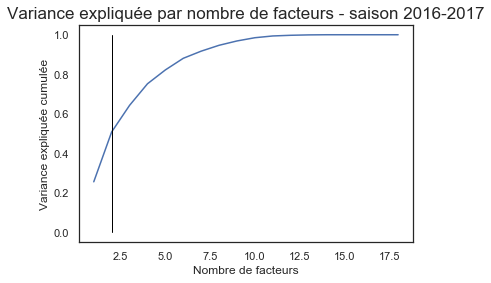

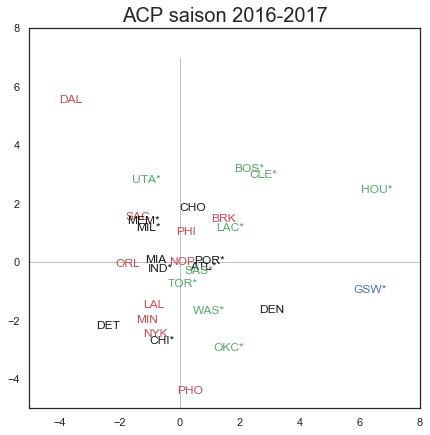

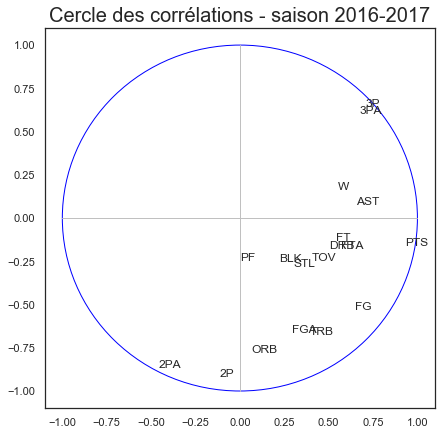

In [50]:
n = stats2016.shape[0]
p = stats2016.shape[1]
sc = StandardScaler()
Z2016 = sc.fit_transform(stats2016)       # Les données sont centrées et réduites

acp = PCA(svd_solver='full')

coord = acp.fit_transform(Z2016)          # On a les coordonnées des points dans l'ACP

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(stats2016)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

eigval = (n-1)/n*acp.explained_variance_

# Calcul de la variance expliquée en fonction du nombre d'axes principaux retenus
sns.set(style="white", palette="deep", color_codes=True)
plt.grid(b=None)

plt.plot(np.arange(1,p+1),np.cumsum(acp.explained_variance_ratio_)) 
plt.plot([2,2],[1,0],color='black',linestyle='-',linewidth=1)
plt.title("Variance expliquée par nombre de facteurs - saison 2016-2017", fontsize = 17)
plt.ylabel("Variance expliquée cumulée")
plt.xlabel("Nombre de facteurs")
plt.grid()
plt.show()

bs = 1/np.arange(p,0,-1)
bs = np.cumsum(bs)
bs = bs[::-1]

# On crée 3 groupes de couleur : un pour les 10 meilleurs bilans de la ligue, 
# un pour les 10 moins bons bilans, un pour les 10 bilans intermédiaires 
# et un pour les GSW

stats2016['Group']= stats2016['W']              

for i in range(0,30) :
    if int(stats2016['W'][i]) > stats2016['W'].astype(int).quantile(.66) :
        stats2016['Group'][i] = 2 
    else :
        if int(stats2016['W'][i]) > stats2016['W'].astype(int).quantile(.34) :
            stats2016['Group'][i] = 1
        else : 
            stats2016['Group'][i] = 0
    if stats2016['W'].index[i] == "GSW*" :
        stats2016['Group'][i] = 3

types2016 = stats2016['Group']
modalites2016 = np.unique(types2016)    
couleurs = ['r','k','g','b']

fig, axes = plt.subplots(figsize=(7,7)) 
axes.set_xlim(-5,8)
axes.set_ylim(-5,8)
sns.set(style="white", palette="deep", color_codes=True)
plt.grid(b=None)

for c in range(len(modalites2016)):
    numero = np.where(types2016 == modalites2016[c])
    for i in numero[0]: 
        plt.annotate(stats2016.index[i],(coord[i,0],coord[i,1]),color=couleurs[c])

plt.plot([-7,10],[0,0],color='silver',linestyle='-',linewidth=1) 
plt.plot([0,0],[-7,7],color='silver',linestyle='-',linewidth=1)
plt.title("ACP saison 2016-2017", fontsize = 20)
plt.grid()
plt.show()

# Création du cercle des corrélations

di = np.sum(Z2016**2,axis=1) 

cos2 = coord**2
for j in range(p):
    cos2[:,j] = cos2[:,j]/di 
    
sqrt_eigval = np.sqrt(eigval)

corvar = np.zeros((p,p))
for k in range(p):
    corvar[:,k] = acp.components_[k,:] * sqrt_eigval[k]
    
stats2016=stats2016.drop(["Group"], axis =1)

fig, axes = plt.subplots(figsize=(7,7))   
axes.set_xlim(-1.1,1.1)
axes.set_ylim(-1.1,1.1)
sns.set(style="white", palette="deep", color_codes=True)
plt.grid(b=None)

for j in range(p):
    plt.annotate(stats2016.columns[j],(corvar[j,0],corvar[j,1]))

plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1) 
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)
plt.title("Cercle des corrélations - saison 2016-2017", fontsize = 20)
plt.grid()
 
# Ajout d'un cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False) 
axes.add_artist(cercle)

plt.show()

La comparaison des ACP sur les saisons 2010-2011 et 2016-2017 montre de vastes changements dans la ligue.

L'on constate en effet une homogénéisation du style de jeu en fonction du niveau des équipes, visible par la séparation bien moins nette entre les meilleures et les moins bonnes équipes sur le mapping des individus de l'ACP 2016-2017. En bref, les styles de toutes les équipes semblent bel et bien avoir convergé.

De nombreuses équipes (à l'exception de Phoenix, tout en bas de l'arbre), axent de plus en plus leur jeu sur le tir à 3 points, par pur mimétisme par rapport au succès des Warriors. Toutefois, l'axe principal (que l'on pourrait appeller "éfficacité"),qui explique un tiers de la variance, révèle mieux le succès que l'axe vertical (2pts-3pts) au vu des positions des groupes. Ce qui compte ce n'est donc pas de vouloir tirer comme les Warriors, mais bien de le faire de manière efficace, pour gagner des matchs.  

En conclusion, on observe entre 2010 et 2017 :
- une forte augmentation du nombre de 3 points réussis et tentés et de passes décisives dans la ligue, encore accélérée après le premier titre des Warriors
- une homogénéisation des styles de jeu dans la ligue en fonction du niveau des équipes
- le fait que l'axe 2 points - 3 points ne soit plus un axe principal de l'ACP, ce qui s'explique par la convergence des stratégies de tir de le plupart des équipes vers le style des Warriors. Mais il reste l'axe secondaire, mettant en lumière les différents centre de gravité entre les équipes. Houston voit son succès reposer bien plus sur son volume de trois points que Golden State.  
- Désormais, l'axe principal se trouve être celui de l'éfficacité offensive, mettant à l'honneur le nombre de points inscrits et donc le nombre de victoires. 

**On peut donc bel et bien conjecturer que, sous l'impulsion des Warriors, la ligue a changé pour devenir plus offensive et s'est homogénéisée vers le style des Warriors.**

### B. Jouer différemment, gagner différemment ? L'évolution des facteurs de succès avant et après la révolution des Warriors 

#### a) Etude des corrélations par années 

Une bonne manière de rentrer dans le problème nous a semblé être d'**observer l'évolution des corrélations entre les variables** ; et en particulier l'évolution des corrélations **avec la variable W** (wins), afin de déterminer si la hausse des 3 points tentés a bien été - à l'échelle de la ligue - une arme fatale.

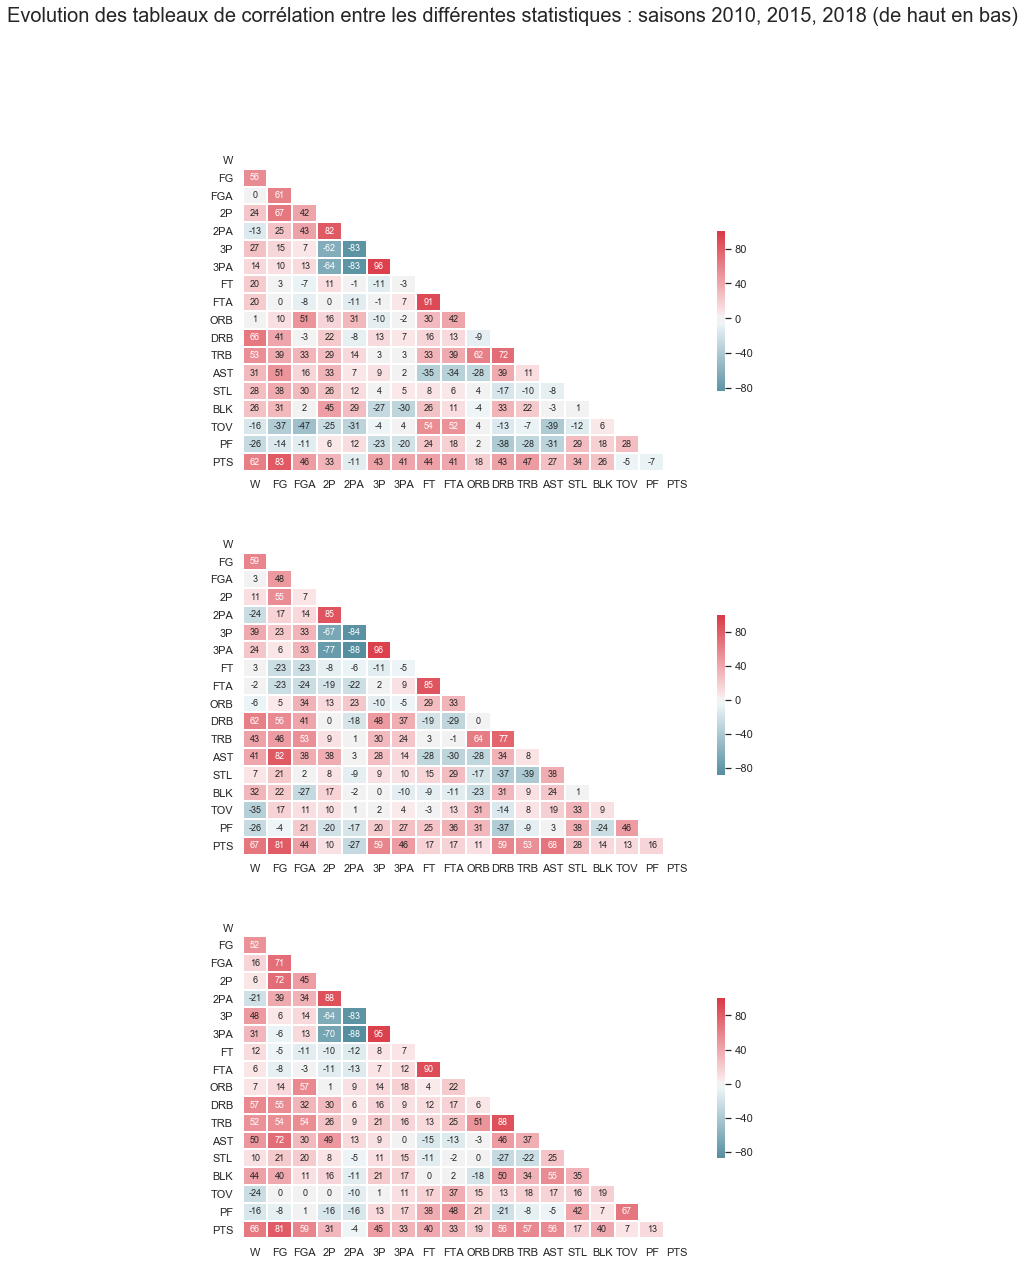

In [51]:
sns.set(style="white")

# La matrice de corrélation de l'année 2011
corr = (stats2011.astype(float).corr()*100).astype(int)

# Qu'on coupe en 2 en masquant la partie supérieure
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

#Génération d'une colormap divergeante, générant une palette du rouge au bleu
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Heatmap avec affichage des coefficients de corrélation (annot=true) entre chaque variable
fig, axs=plt.subplots(3, figsize=(10,20))
plt.suptitle('Evolution des tableaux de corrélation entre les différentes statistiques : saisons 2010, 2015, 2018 (de haut en bas)', fontsize = 20)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=100, center=0, annot=True, fmt="0", linewidths=1, cbar_kws={"shrink": .5}, annot_kws={"size": 9}, ax=axs[0])

#On réitère pour 2015...
corr1 = (stats2015.astype(float).corr()*100).astype(int)
mask1 = np.zeros_like(corr, dtype=np.bool)
mask1[np.triu_indices_from(mask)] = True

sns.heatmap(corr1, mask=mask1, cmap=cmap, vmax=100, center=0, annot=True, fmt="0", linewidths=1, cbar_kws={"shrink": .5}, annot_kws={"size": 9},ax=axs[1])

#Puis pour 2018
corr2= (stats2018.astype(float).corr()*100).astype(int)
mask2= np.zeros_like(corr, dtype=np.bool)
mask2[np.triu_indices_from(mask)] = True

sns.heatmap(corr2, mask=mask2, cmap=cmap, vmax=100, center=0, annot=True, fmt="0", linewidths=1, cbar_kws={"shrink": .5}, annot_kws={"size": 9},ax=axs[2])

Cela peut ne pas sembler évident de prime abord : **le taux d'échec moyen à 3 points étant naturellement plus haut que celui à 2 points**, il se pourrait très bien que les équipes aient tenté d'imiter les Warriors en tentant beaucoup de 3 points sans avoir des joueurs de la trempe de Curry et en gâchant beaucoup, résultant ainsi en une mauvaise stratégie.

Ce n'est pas le cas, nous dit la suite de graphiques. **La corrélation entre le nombre de victoires et de 3 points tentés et réussis, déjà positive en 2010** (27 et 14%) **n'a fait que se renforcer** : 39 et 24% en 2015 ; 48 et 31% (!) la saison dernière. On observe une évolution similaire pour les **passes décisives**. 

Cela s'explique notamment par la remarquable **stabilité de la corrélation entre 3 points tentés et réussis**, à 96% (relation pratiquement affine) : le fait qu'elle n'ait pas baissé montre que le taux de réussite moyen à 3 points est resté constant malgré l'augmentation du nombre de tentatives (qui devrait naturellement aboutir à des tirs plus difficiles, qui auparavant n'auraient pas été pris et avec un taux d'échec plus élevé, mais qui est compensé par le travail des franchises et des joueurs sur le secteur du tir à 3 points, qui devient un atout incontournable).

On déduit donc que **les franchises tirent en moyenne beaucoup à 3 points** sans pour autant tomber dans une 3 points mania contreproductive, avec des faibles taux de réussite. **Cela aboutit à la forte corrélation entre le style de jeu des Warriors** (beaucoup de passes décisives et de 3 points tentés et réussis) **et le nombre de victoires.**

Par ailleurs, on remarque la forte corrélation négative entre 3PA, 3P d'une part et les fautes personnelles (PF) d'autre part. Cette corrélation négative révèle la **plus faible agressivité des équipes tournées vers les 3 points**, due au small ball (peu d'impact physique) et à l'esprit offensif qui parfois pousse les équipes à délaisser la défense, à l'image de Houston, qui - comme on le verra plus tard, a appliqué le modèle Warriors dans une vision jusqu'au-boutiste. 

Vérifions maintenant à l'aide de violinplots que ces corrélations se retranscrivent bien dans la répartition des équipes.

#### b) De la corrélation à la répartition : qui tire à 3 points ? 

Reste à étudier la structure et la répartition des tirs à 3 points entre les équipes, en fonction de leurs résultats.
Pour ce faire, on étudie des split violinplots ; des graphes qui vont nous permettre de comparer la distribution d'une donnée en fonction de l'année et d'un critère binaire de notre choix. Ici, nous choisissons le critère "être dans le top 30% de la ligue" pour étudier le nombre de tirs à 3 points tentés et réussis au cours du temps. 
Si on observe un écart entre les répartitions des split violins, cela signifiera que le comportement des top équipes diffèrent de celui des autres franchises de la ligue en ce qui concerne les 3 points.

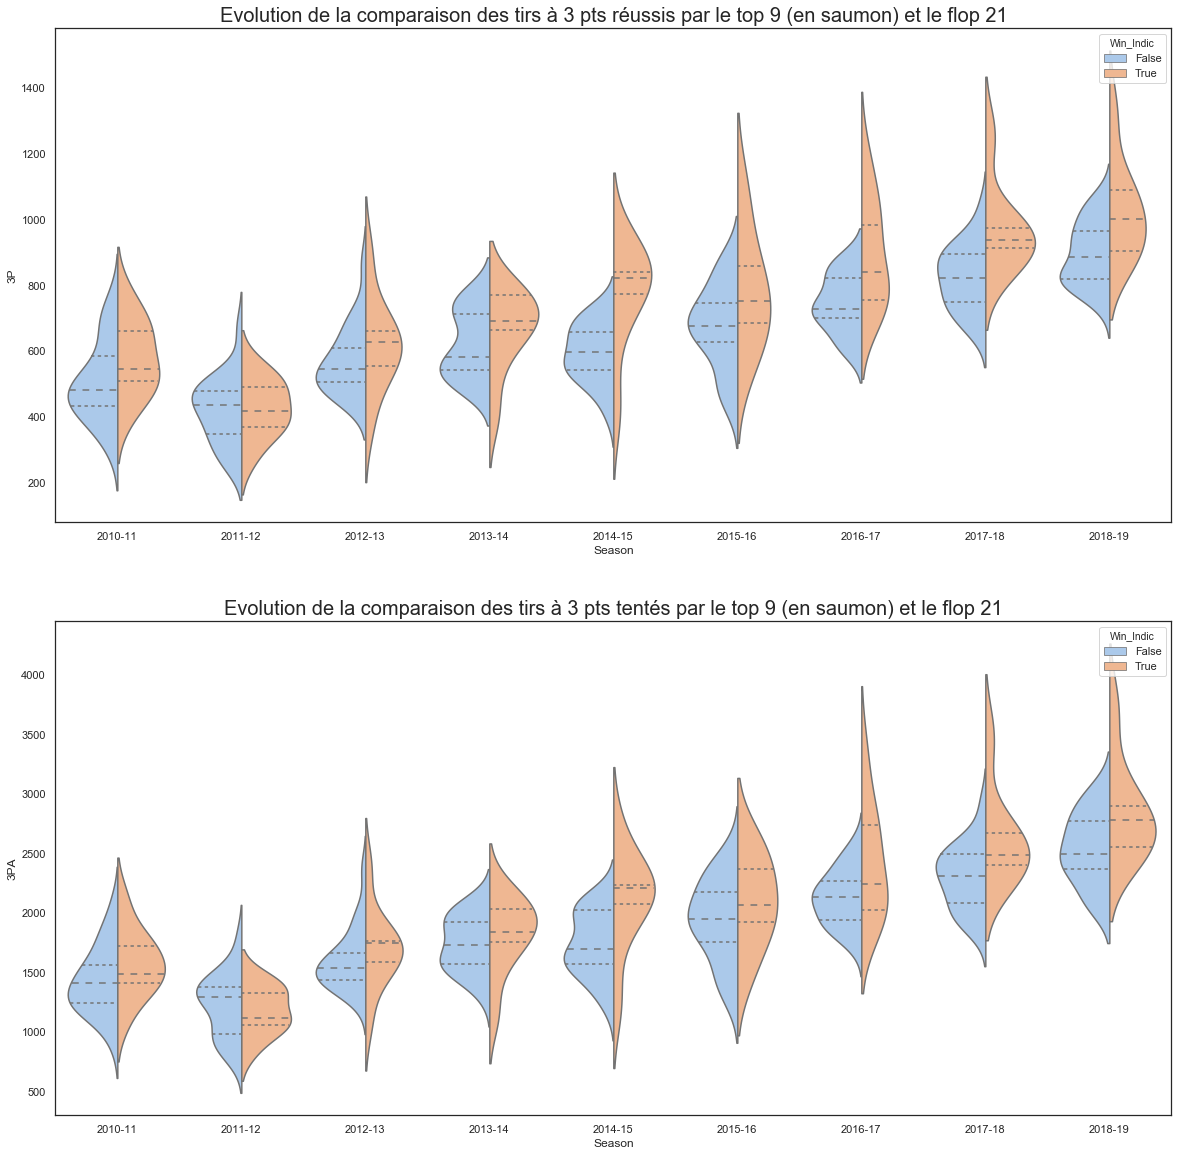

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

In [52]:
mega_Stats['3P'] = mega_Stats['3P'].astype('float')

fix, axs=plt.subplots(2, figsize=(20,20))
sns.set(style="whitegrid", palette="pastel", color_codes=True)
plt.figure(figsize=(20,10))
sns.violinplot(x='Season', y='3P', hue='Win_Indic',
               split=True, inner="quart",ax=axs[0],
               data=mega_Stats.dropna()).set_title("Evolution de la comparaison des tirs à 3 pts réussis par le top 9 (en saumon) et le flop 21", 
                fontsize = 20)
sns.despine(left=True)

mega_Stats['3PA'] = mega_Stats['3PA'].astype('float')

sns.set(style="whitegrid", palette="pastel", color_codes=True)
plt.figure(figsize=(20,10))
sns.violinplot(x='Season', y='3PA', hue='Win_Indic',
               split=True, inner="quart",ax=axs[1],
               data=mega_Stats.dropna()).set_title("Evolution de la comparaison des tirs à 3 pts tentés par le top 9 (en saumon) et le flop 21",
                                                   fontsize = 20)
sns.despine(left=True)


Les violinplots confirment la heatmap : en subdivisant la ligue entre le quantile à 30% et les autres, on voit qu'**il y a un écart systématiquement significativement positif depuis la saison 2014-2015 dans la distibution des tirs à 3 points tentés et réussis, en faveur des top équipes.**

Après une saison 2014-2015 où seules les meilleures équipes avaient été en mesure d'imiter le style des Warriors, **l'écart s'était tassé sur les 3 points tentés** (la qualité d'une équipe n'avait pas d'influence sur sa quantité de 3 points tentés), alors même qu'il restait significatif sur les 3 points réussis (sûrement par manque de profils de tireurs d'élite type Kyle Corver, CJ McCollum, Stephen Curry, ou encore Khris Middleton chez les moins bonnes équipes). Ainsi, depuis 2014, le 3ème quartile sur les tirs à 3 points réussis du top 9 au général tire systématiquement plus que la médiane sur les tirs à 3 points du flop 21 au général. Lors de la dernière saison, les top-équipes ont fait croitre beaucoup plus que le reste de la ligue leur nombre de tentatives à 3 points, résultant à nouveau en un écart significatif sur la statistique.


<font color=blue>**Les tirs à 3 points sont donc aujourd'hui l'arme du fort, là où ils pouvaient par le passé être interprétés comme une preuve de faiblesse et de manque de solutions**</font>, notamment dans la saison 2011-2012, où les équipes dans le flop 21 tiraient nettement plus à 3 points que les équipes du top 9.


On retient donc 3 éléments de ces violinplots :
- **L'augmentation très importante du nombre de 3 points tentés et réussis**, visible par le glissement vers le haut des densités, pour toutes les équipes.
- **Le changement de destin du 3 points**, qui passe d'une marque de manque de solution au **système préférentiel d'accès aux points pour les top équipes.** Comme preuve, chez les top équipes, le taux de croissance des 3 points tentés est plus élevé que chez le reste de la ligue.
- Le fait que **la réduction de l'écart entre top équipes et reste de la ligue en ce qui concerne les 3 points tentés en 2017 et 2018 n'ait pas été suivi d'un rattrapage en ce qui concerne les 3 points réussis.** On en déduit que - si globalement toutes les équipes tentent de prendre le tournant du 3 points - cette stratégie **manque d'efficacité chez certaines équipes.**

#### c) Identification de nouveaux Key Success Factors via des régressions linéaires

On cherche à expliquer (pas à prédire) le nombre de victoires par les statistiques qu'on a collectées sur notre base de données, avant la domination des Warriors, pendant les années où les Warriors n'étaient imités que par les meilleures équipes, et depuis que le style des Warriors s'est popularisé à pratiquement toute la NBA. 

Pour cela, on propose d'utiliser des régressions linéaires pour **estimer l'évolution des effets causaux de chaque type de variable**.

On cherche donc à écrire W comme une combinaison linéaire des indicateurs d'intérêt. W est une variable quantitative, pouvant prendre des valeurs situées approximativement entre 15 et 75 et suivant une loi proche d'être normale (cf graphe comparant la densité d'une loi normale et la densité observée). Les indicateurs d'intérêt sont toutes des statistiques quantitatives. Pour ces raisons, la régression linéaire est préférable à tout autre type de régression (logistique, par exemple).

On effectuera une régression linéaire multiple sur chacune des 3 périodes, pour ne pas surcharger les informations.
La division par périodes plutôt que par année s'explique par une volonté de garder des résultats significatifs, sachant que chaque groupe semble cohérent intérieurement au vu de ce qui précède.

Afin de ne pas biaiser nos résultats (colinéarité de variables explicatives), on enlève des statistiques explicatives du jeu : 
- 3PA, 2PA et FTA, trop corrélés avec 3P, 2P et FT respectivement (corr>0.8)
- FG et PTS, qui sont des combinaisons linéaires de 3P, 2P et 3P, 2P et FT respectivement (FG est également trop corrélé avec AST)

Cela nous mène à une volonté d'écrire pour la période i :
Win(i) = constante + combinaison linéaire de (3P, 2P, FT, AST, BLK, PF, ORB, DRB, TOV, STL)
Win(i) = alpha(i) + bêta1(i)x2P + bêta2(i)x3P + bêta3(i)xFT + bêta4(i)xAST + bêta5(i)xORB + bêta6(i)xTOV + bêta7(i)xDRB+ bêta8(i)xPF + bêta9(i)xSTL + bêta10(i)xBLK.

L'évolution de ces coefficients et de leur significativité nous permettra de déterminer l'évolution de l'importance des facteurs de réussite d'une équipe.

Les niveaux de significativité retenus sont 5% sur les périodes 1 et 3 et 10% sur la période 2 (qui ne comporte que 2 ans, ce qui génère plus d'incertitude).

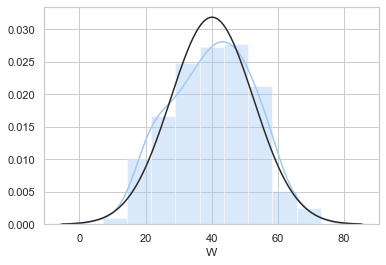

In [53]:
sns.distplot(mega_Stats["W"], bins=9, fit=norm, kde=True) #Comparaison de la densité d'une loi normale avec la densité de Wins.

In [54]:
#On découpe la période en 3 pour comparer l'effet causal de chaque paramètre étudié sur chaque période de temps

stats_pre_warriors=pd.concat([stats2010_,stats2011_,stats2012_,stats2013_])
stats_warriors=pd.concat([stats2014_,stats2015_])
stats_post_warriors=pd.concat([stats2016_,stats2017_,stats2018_])

In [55]:
y=stats_pre_warriors.dropna()["W"]
X=stats_pre_warriors.dropna()[['2P','3P','FT','AST','ORB','TOV','DRB','PF','STL','BLK']]
X = sm.add_constant(X)
model = sm.OLS(y.astype(float), X.astype(float))
results = model.fit()
print(results.summary())

y=stats_warriors.dropna()["W"]
X=stats_warriors.dropna()[['2P','3P','FT','AST','ORB','TOV','DRB','PF','STL','BLK']]
X = sm.add_constant(X)
model = sm.OLS(y.astype(float), X.astype(float))
results = model.fit()
print(results.summary())

y=stats_post_warriors.dropna()["W"]
X=stats_post_warriors.dropna()[['2P','3P','FT','AST','ORB','TOV','DRB','PF','STL','BLK']]
X = sm.add_constant(X)
model = sm.OLS(y.astype(float), X.astype(float))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      W   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.584
Method:                 Least Squares   F-statistic:                     17.70
Date:                Fri, 20 Dec 2019   Prob (F-statistic):           1.00e-18
Time:                        18:49:45   Log-Likelihood:                -416.50
No. Observations:                 120   AIC:                             855.0
Df Residuals:                     109   BIC:                             885.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2748      8.133      0.157      0.8

/Users/clementchaffard/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


En ce qui concerne les tirs :
- **Sur la première période, l'on ne peut pas rejeter à 5% l'hypothèse selon laquelle les 3 points n'ont aucun impact, ni celle selon laquelle les 2 points n'ont aucun impact** : on reste donc un peu dans le flou. Seule certitude : mettre beaucoup de lancers-francs est un avantage significatif. Les équipes concernées sont soit celles qui ont le meilleur taux de réussite aux lancers, soit celles sur lesquelles sont créées beaucoup de fautes (c'est typiquement le cas quand un joueur est difficile à défendre).
- Sur la deuxième période, **on remarque un vrai glissement** : les deux points marqués ont à présent un impact significatif et positif, tout comme les 3 points ; alors que l'impact des lancers-francs devient non-significatif. **De plus, le passage des 3 points dans la zone de significativité provient d'une augmentation de son coefficient, et non d'une baisse de son écart-type : c'est l'effet causal qui s'est agrandi pour rendre le nombre de 3 points rentrés significatif. Cela traduit bien la bascule vers un style de jeu porté sur les 3 points, et beaucoup moins sur la pénétration, génératrice de nombreuses fautes et donc de lancers-francs.**
- Sur la troisième période, avec **l'harmonisation et l'imitation généralisée du style de Golden State, les 3 points jouent un rôle moins important (mais toujours significatif !) dans la qualité des équipes**. 

En ce qui concerne les autres statistiques offensives :
- **Le nombre de passes décisives et le nombre de rebonds offensifs n'ont jamais d'impact significatif sur le nombre de victoires**. On en déduit qu'au-delà des tirs, **le style offensif (construit ou basé sur des rebonds pris dans la raquette) n'a que peu d'impact sur le nombre de victoires, à ce niveau d'analyse**.
- **Les pertes de balle en attaque ont un impact significatif négatif mais absolument décroissant sur le nombre de victoires.** Cela peut s'expliquer par le fait que les pertes de balle ont deux origines : l'imprécision technique ou la prise de risque dans le jeu. Le jeu plus offensif inspiré par les Warriors a amené plus de prise de risque des meilleures équipes dans le jeu et une plus faible défense. **Par conséquent, l'effet de l'imprécision technique, qui tirait vers le bas les équipes perdant souvent des ballons, est diminué (moins de harcèlement défensif sur les équipes faibles techniquement). A contrario, des équipes fortes se sont mises à perdre beaucoup de ballons, à l'image de Golden State. Cela a abouti a une constance du nombre moyen de ballons perdus, mais à en diversifier les causes, et à en réduire l'impact causal négatif, puisque la perte de balle n'est plus l'apanage des mauvaises équipes.**

En ce qui concerne les statistiques défensives :
- les rebonds défensifs n'ont pas d'impact significatif sur le nombre de victoires, de manière surprenante.
- les blocs, quand ils ont un impact significatif (sur les périodes 1 et 3) ont un effet positif sur le nombre de victoires, révélant ainsi une prime à la défense.
- **les interceptions ont un effet positif significatif sur le nombre de victoires, dont la valeur décroît puis croît.**
- **les fautes ont un impact significativement négatif pratiquement constant sur le nombre de victoires.** 

### C. Budget limité, stabilité de l'effectif : quid de l'impact des autres composantes de la recette des Warriors ?

#### a) Faut-il payer la luxury tax pour aller en playoff ? 

In [56]:
np.mean(mega_Stats.groupby('Tms').get_group('GSW')['R_Budget'])

1.0999284506327538

Tout d'abord, les Warriors ont fonctionné avec une **masse salariale parmi les plus hautes de la ligue sur la période** (R_Budget a une moyenne à 1, par construction, donc les Warriors ont eu sur la période 10% de budget en plus que le budget moyen, pour un résultat de 5 finales NBA et 3 titres. Sans jamais être l'équipe la plus dotée, les Warriors ont toutes les saisons émargé au dessus de la moyenne des budgets.

Les Warriors se sont appuyés pour cela sur les premières années de notre étude, alors que Curry ou Thompson n'étaient que des *rookies* (débutants), avec le contrat qui va avec, et avait donc un budget relativement faible au début de la décennie, avant d'augmenter avec les revalorisations salariales et les prolongations de contrat.

Le choix de l'exécutif des Warriors de garder ces rookies et de les installer dans le 5 majeur a permis aux Warriors de maintenir un effectif extrêmement stable sur la période, ainsi que de ne pas faire décoller leur budget salaires.

Alors ce modèle a-t-il fait des émules ? Y a-t-il une forme de **corrélation entre les plus gros budgets et les performances ?** D'autres équipes ont-elles fait le choix de garder beaucoup de constance dans leur effectif ?

Observons d'abord les liens entre masse salariale et performance, en observant la répartition de la masse salariale en fonction des performances de l'équipe à l'aide d'un violinplot.

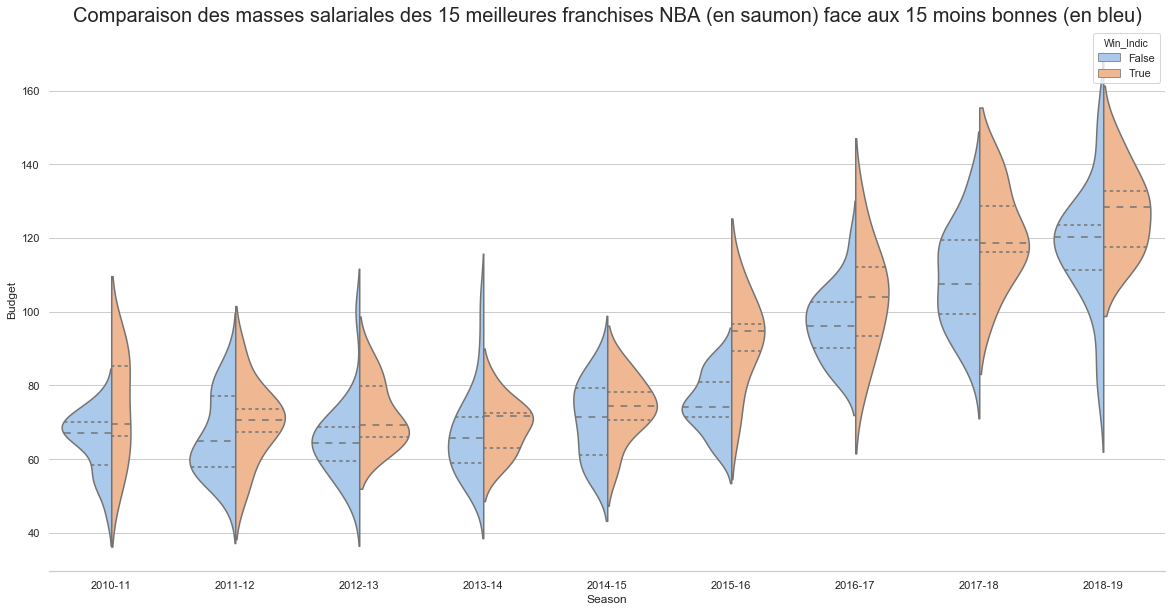

In [57]:
mega_Stats['Budget'] = mega_Stats['Budget'].astype(float)

sns.set(style="whitegrid", palette="pastel", color_codes=True)
plt.figure(figsize=(20,10))
sns.violinplot(x='Season', y='Budget', hue='Win_Indic',
               split=True, inner="quart",
               data=mega_Stats.dropna()).set_title("Comparaison des masses salariales des 15 meilleures franchises NBA (en saumon) face aux 15 moins bonnes (en bleu)", fontsize = 20)
sns.despine(left=True)

Premièrement, **les masses salariales** (exprimées ici en millions d'euros) **ont quasi doublé sur la décennie.** Cette explosion a été initiée grâce au **nouveau contrat télévisuel**, négocié en fin 2014, qui a doublé les droits télévisuels de retransmission aux USA. Elle a ensuite été soutenue et alimentée par l'augmentation des droits télévisuels à l'étranger, l'amélioration des ventes de merchandizing et même une meilleure billeterie. Par conséquent, le plafond salarial des franchises, qui est indexé sur les revenus de la Ligue, a fortement augmenté, permettant aux équipes une **revalorisation des salaires.** 

Si les Warriors ne sont pas directement à l'origine de l'augmentation des revenus de la Ligue, l'impact qu'ils ont eu sur le jeu, **le rendant bien plus spectaculaire,** a contribué à faire monter les enchères entre diffuseurs et publicitaires (depuis la saison 2017-2018 la NBA autorise les sponsor maillots). La franchise californienne a ainsi obtenu avec Rakuten le contrat de sponsoring maillot le plus rentable de la NBA.     

L'évolution des violinplots montre que **les meilleures équipes ont de plus en plus tendance à être celles ayant un gros budget salaires et payant la "luxury tax"**. Une explication à cela est que - pour contrer l'hégémonie des Warriors - certaines franchises ont essayé d'attirer plusieurs stars avec un gros contrat. Une autre explication à cela est que les premiers bénéficiaires des hausses du plafond salarial ont été les stars du basketball : ainsi, les franchises à forte masse salariale contiennent souvent en leur rang une ou deux superstars, qui changent la face de la franchise. A contrario, **les franchises n'étant pas parvenues à attirer de grand nom sont bien en-dessous du *salary cap*** car le salaire des joueurs moyens a augmenté moins vite que le *salary cap*.

Voyons à l'aide d'une régression logistique si les différences de budget entre les top équipes et les autres sont significatives, et comment elles évoluent avec le temps. On étudie en effet ici Win_Indic, une indicatrice valant 1 lorsque l'équipe est dans le top 9 de la ligue et 0 sinon. C'est donc une variable qualitative, qu'on souhaite expliquer par le budget, une variable quantitative. Par conséquent, il faut préférer une régression logistique à une régression linéaire.

In [58]:
y=stats_pre_warriors.dropna()["Win_Indic"]
X=stats_pre_warriors.dropna()[['Budget']]
X=sm.add_constant(X)
model = sm.Logit(y.astype(int),X.astype(int))
results = model.fit()
print(results.summary())


y=stats_post_warriors.dropna()["Win_Indic"]
X=stats_post_warriors.dropna()[['Budget']]
X=sm.add_constant(X)
model = sm.Logit(y.astype(int),X.astype(int))
results = model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.583298
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:              Win_Indic   No. Observations:                  120
Model:                          Logit   Df Residuals:                      118
Method:                           MLE   Df Model:                            1
Date:                Fri, 20 Dec 2019   Pseudo R-squ.:                 0.04513
Time:                        18:49:46   Log-Likelihood:                -69.996
converged:                       True   LL-Null:                       -73.304
Covariance Type:            nonrobust   LLR p-value:                   0.01011
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.1947      1.375     -3.050      0.002      -6.890      -1.499
Budget         0.0494      0.

Si **l'effet de la masse salariale semble diminuer au cours du temps**, il est de plus en plus **stable**, de moins en moins volatil, et donc de plus en plus **certain**. Il devient significatif au seuil des 5% lors de la période 2016-2019, avec un effet causal positif. **On en conclut qu'il est de plus en plus probable que le budget salaires joue un rôle dans le classement des équipes, sans pouvoir véritablement tirer de conclusion sur l'effet des Warriors dans ce phénomène.**


#### b) Une équipe qui gagne ne change pas : Impact du maintien de l'effectif entre 2014 et 2018 sur le nombre de victoires en 2018

De même, on s'essaye à une régression de la stabilité de l'effectif entre 2014 et 2018 sur le nombre de victoires de l'équipe.

De là, cette régression n'aurait pas de sens pour les victoires hors de l'année 2018, car la stabilité entre 2014 et 2018 ne présuppose pas la stabilité sur les années précédentes ou suivantes. On choisit donc de se focaliser sur la saison 2018-2019 sur cette régression. 

Nous faisons appel à une régression linéaire (on approxime une variable quantitative par une variable quantitative) avec constante pour ne pas distordre les résultats en surestimant l'effet causal de la stabilité. 

In [59]:
y=stats2018_["W"]
X=stats2018_[['Stability']]
X=sm.add_constant(X)

model = sm.OLS(y.astype(float), X.astype(float))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      W   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.121
Method:                 Least Squares   F-statistic:                     5.001
Date:                Fri, 20 Dec 2019   Prob (F-statistic):             0.0335
Time:                        18:49:46   Log-Likelihood:                -114.21
No. Observations:                  30   AIC:                             232.4
Df Residuals:                      28   BIC:                             235.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         37.1616      2.680     13.864      0.0

La **régression de l'indicateur de stabilité des effectifs sur le nombre de victoires dans la saison 2018-2019 révèle un effet causal positif significatif à 5% de la stabilité**. **Les équipes plus stables** - c'est-à-dire celles dont le 5 majeur a conservé le plus de joueurs identiques entre la saison 2014-2015 et la saison 2018-2019 - **gagnent en moyenne plus que les équipes moins stables.**

Plus précisément, un titulaire conservé dans l'effectif apporte en moyenne une hausse de 5 victoires sur cette saison.

Dans le cas de la franchise californienne, la stabilité a longtemps été érigée en quasi-philosophie : plutôt que de chercher à empiler des stars issues de l'extérieur, l'exécutif des GSW a choisi de laisser les clés en main au 5 vainqueur en 2014-2015. Ainsi, les GSW sont l'équipe la plus stable sur la période étudiée, avec un seul changement dans le 5 majeur en 5 saisons (Harrison Barnes, remplacé par Kevin Durant).

**Ce choix de la stabilité de l'effectif permet le développement d'automatismes impressionnants, permettant l'essor du nombre de passes décisives notamment.**

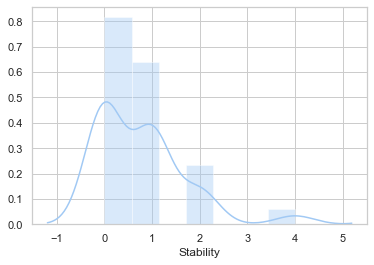

In [60]:
sns.distplot(Stab_Effectif["Stability"], kde=True)

Pour autant, le modèle des Warriors n'a été suivi pour ainsi dire... que par les Warriors. Seule équipe à 4 titulaires communs depuis 2014, ses dauphines dans le classement n'ont que 2 joueurs communs dans le 5 majeur depuis 2014. **Le modèle de stabilité qu'ont été les Warriors ne fait donc pour l'instant pas véritablement d'émules, dans un monde du basketball où les transferts sont légions.** 

### D. Une influence sur la NBA... et même au-delà : l'évolution de la Pro A 

#### a) Scrapping et travail sur la base de données de la ligue nationale de basketball française 

In [61]:
#Recensement des url des pages sur lesquelles scrapper les données de la pro 1. Elles ne semblent pas suivre de suite logique, ce qui empêche l'automatisation du processus.

url_pro_a=['https://www.lnb.fr/fr/pro-a/statistiques-equipes-31.html?season=2010&competition=46&format=total&team_stats_type=offense',
          'https://www.lnb.fr/fr/pro-a/statistiques-equipes-31.html?season=2011&competition=54&format=total&team_stats_type=offense',
          'https://www.lnb.fr/fr/pro-a/statistiques-equipes-31.html?season=2012&competition=61&format=total&team_stats_type=offense',
          'https://www.lnb.fr/fr/pro-a/statistiques-equipes-31.html?season=2013&competition=69&format=total&team_stats_type=offense',
          'https://www.lnb.fr/fr/pro-a/statistiques-equipes-31.html?season=2014&competition=76&format=total&team_stats_type=offense',
          'https://www.lnb.fr/fr/pro-a/statistiques-equipes-31.html?season=2015&competition=84&format=total&team_stats_type=offense',
          'https://www.lnb.fr/fr/pro-a/statistiques-equipes-31.html?season=2016&competition=92&format=total&team_stats_type=offense',
          'https://www.lnb.fr/fr/pro-a/statistiques-equipes-31.html?season=2017&competition=105&format=total&team_stats_type=offense',
          'https://www.lnb.fr/fr/pro-a/statistiques-equipes-31.html?season=2018&competition=150&format=total&team_stats_type=offense']

In [62]:
def scrapping_pro_a(i):
#On définint la fonction pour scrapper la saison i-i+1
    url = url_pro_a[i-2010]
    request_text = request.urlopen(url).read()
    page = bs4.BeautifulSoup(request_text, "lxml")
    rows = page.findAll('table')     #On recherche les tableaux      
    pro_a = pd.read_html(str(rows))[0] #On prend le premier tableau
    pro_a.columns=pro_a.columns.droplevel() #On enlève les surcolonnes
    pro_a['Saison']=i #On définit une colonne 'Saison'
    pro_a.drop('MJ',axis=1)
    return pro_a

In [63]:
big_tableau_pro_a=scrapping_pro_a(2010)
for i in range(2011,2019):
    big_tableau_pro_a=pd.concat([big_tableau_pro_a,scrapping_pro_a(i)])
    i=+1
big_tableau_pro_a=big_tableau_pro_a.reset_index()
big_tableau_pro_a.head()
#Concaténation de la fonction ci-dessus pour chaque année d'étude pour donner un gros tableau

,index,Equipes,MJ,Pts,Tirs,%,3 pts,%.1,LF,%.2,...,T,Pr,Ct,Pd,In,Bp,Fte,Fpr,Év,Saison
0,0,Chalon/Saône,30,2360,864 - 1880,46.0,262 - 715,36.6,370 - 494,74.9,...,1049,73,78,550,248,420,584,543,2720,2010
1,1,Cholet,30,2293,881 - 1872,47.1,165 - 498,33.1,366 - 546,67.0,...,1146,113,72,484,220,403,533,543,2682,2010
2,2,Gravelines-Dunkerque,30,2292,827 - 1905,43.4,223 - 715,31.2,415 - 644,64.4,...,1217,136,82,468,231,400,457,594,2637,2010
3,3,Hyeres-Toulon,30,2308,898 - 1987,45.2,188 - 578,32.5,324 - 470,68.9,...,1159,45,106,512,251,434,495,533,2606,2010
4,4,Le Havre,30,2201,825 - 1843,44.8,161 - 557,28.9,390 - 556,70.1,...,1105,77,78,476,226,437,519,549,2464,2010


In [64]:
del big_tableau_pro_a['index'] #colonne inutile

In [65]:
col = big_tableau_pro_a.apply( lambda row : (float(str(row["3 pts"][0:3]))) , axis = 1 ) #Création d'une colonne donnant en float le nombre de 3 points réussis par chaque équipe
col1=big_tableau_pro_a.apply( lambda row : (float(str(row["3 pts"][6:9]))) , axis = 1 ) #Création d'une colonne donnant en float le nombre de 3 points tentés par chaque équipe
big_tableau_pro_a["3 pts r"] = col #rajout des colonnes à notre tableau de base : on a contourné la syntaxe xxx - yyy du tableau original et on peut maintenant travailler sur le nombre de tirs tentés et réussis à 3 points
big_tableau_pro_a["3 pts t"] = col1

#### b) Analyse de l'évolution du style de jeu en Pro A 

Cherchons à déterminer les principales évolutions dans le jeu des équipes de Pro A sur les statistiques que le jeu des Warriors a fait évoluer, sur la période.

In [66]:
#Fonction retournant la moyenne de category pour chaque saison.

def moyenne_pro_a(category):

    moyenne_pro_a_=big_tableau_pro_a.groupby('Saison')[str(category)].mean().tolist()
    col2=big_tableau_pro_a['Saison'].unique().tolist() #Création d'une colonne Saison pour savoir quel chiffre est associé à quand
    pro_a_graphes = pd.DataFrame({'Saison': col2, 'moyenne_'+str(category): moyenne_pro_a_}) #Nom dynamique de la colonne d'intérêt
    return pro_a_graphes

In [67]:
moyenne_pro_a('3 pts r').merge(moyenne_pro_a('3 pts t'),on='Saison',how='outer').merge(moyenne_pro_a('Pd'),on='Saison',how='outer').round(2)
#Fusion pour regarder l'évolution de la moyenne de 3 points tentés, réussis et de passes décisibes par saison

,Saison,moyenne_3 pts r,moyenne_3 pts t,moyenne_Pd
0,2010,209.88,625.69,495.12
1,2011,210.25,602.56,481.31
2,2012,203.62,583.81,453.62
3,2013,235.25,656.12,469.12
4,2014,266.06,756.28,561.89
5,2015,271.22,766.22,563.17
6,2016,267.28,752.00,587.39
7,2017,275.83,772.94,603.50
8,2018,276.06,758.78,626.44


On constate - comme aux USA - **une très forte hausse du nombre de 3 points tentés, réussis et de passes décisives sur la période.**

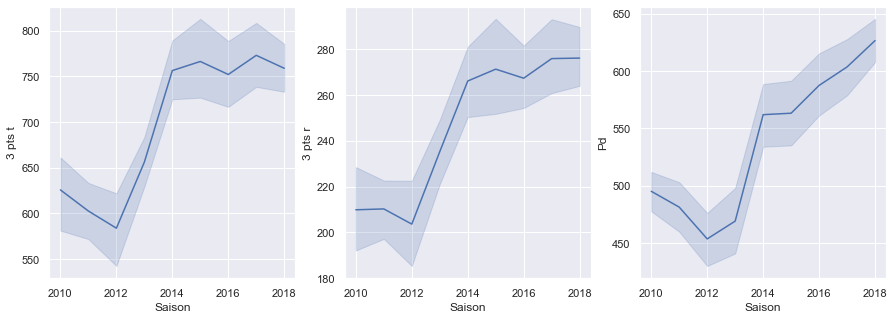

In [68]:
#On trace l'évolution du nombre de 3 points tentés, réussis et de passes décisives en fonction du temps, sur un même graphe

sns.set(style="darkgrid")
f, axes = plt.subplots(1, 3, figsize = (15,5))
sns.lineplot(x="Saison", y="3 pts t", data=big_tableau_pro_a, ax=axes[0])
sns.lineplot(x="Saison", y="3 pts r", data=big_tableau_pro_a, ax=axes[1])
sns.lineplot(x="Saison", y="Pd", data=big_tableau_pro_a, ax=axes[2])

On remarque une **forte hausse des tirs à 3 points tentés et réussis dans la saison 2014-2015**, et une **augmentation** toujours très rapide du **nombre de passes décisives en France.** Si l'impact des Warriors ne pourra pas être démontré *stricto sensu* ici, il y a fort à parier, au vu de l'influence du basketball américain en France, que le style des Warriors aient imprégné un certain nombre d'équipes.

Pour autant, **le nombre de 3 points augmente nettement moins vite depuis la saison 2015-2016.** Le **basket européen**, beaucoup plus tactique et **moins spectaculaire** que le basketball américain, semble donc depuis revendiquer sa spécificité, et ne se laisse plus entrainer dans le tourbillon de hausse des tirs à 3 points. Pour autant, les idéaux de construction du jeu défendu par les Warriors, plus compatibles avec l'ADN du basket européen et aboutissant à la hausse du nombre de passes décisives, continuent à parler aux équipes européennes.

In [69]:
#Fonction renvoyant les stats d'une saison donnée en entrée

def stats_saison(debut_saison):
    u=big_tableau_pro_a.groupby("Saison")
    s_saison=u.get_group(debut_saison)
    return s_saison

#Graphe traçant la densité d'une statistique donnée sur uen saison donnée
def densite_saison(categorie,debut_saison=None):
    if debut_saison is None:
        sns.distplot(big_tableau_pro_a[str(categorie)], kde=True)
    else:
        sns.distplot(stats_saison(debut_saison)[str(categorie)], kde=True)

#Fonction empilant les densités sur 4 ans spécifiés
def evolution_densite_saisons(categorie,saison1,saison2,saison3,saison4):
        sns.distplot(stats_saison(saison1)[str(categorie)], kde=True,hist=False,label=str(saison1))
        sns.distplot(stats_saison(saison2)[str(categorie)], kde=True,hist=False,label=str(saison2))
        sns.distplot(stats_saison(saison3)[str(categorie)], kde=True,hist=False,label=str(saison3))
        sns.distplot(stats_saison(saison4)[str(categorie)], kde=True,hist=False,label=str(saison4))

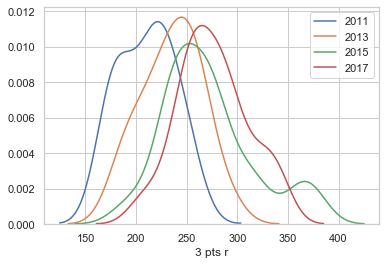

In [70]:
sns.set(style='whitegrid')
evolution_densite_saisons('3 pts r',2011,2013,2015,2017)

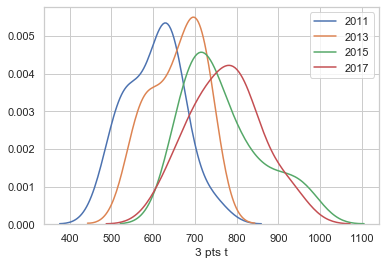

In [71]:
evolution_densite_saisons('3 pts t',2011,2013,2015,2017)

On constate - au vu du décalage vers la droite de densités similaires - qu'il y a un effet structurel de hausse de tirs réussis à 3 points, qui touche toutes les équipes. Sur les 3 points tentés, en revanche, il y a une différence croissante entre les équipes qui tentent le plus (peut-être sous influence transatlantique) et celles qui tentent le moins. Mais globalement, **la quantité de 3 points tentés et réussis ne cesse d'augmenter.**

Il est ainsi particulierement frappant de voir le **nombre de trois points tentés et réussis**, ainsi que le **nombre de passes décisives, augmenter significativement** au cours de la saison 2014-2015. Le basket européen s'inspire évidemment du basket outre-atlantique (et la réciproque est moins vraie), par conséquent on peut avancer que le Warriors effect a même traversé l'Océan ! Pour autant, depuis la saison 2015-2016, c'est surtout l'évolution vers un style plus construit, également défendu par les Warriors, avec **beaucoup de passes décisives,** qui résonne aux oreilles des clubs européens, qui ne voient pas leurs stats à 3 points grimper aussi vites que chez leurs confrères outratlantiques.


**En résumé, il est manifeste que la réussite du style de jeu développé par le "Nuclear lineup" a inspiré la grande majorité des autres équipes, jusqu'à devenir la norme en NBA.** Les équipes se sont mises à user et abuser du tir à 3 points, et ont délaissé le jeu intérieur. 

**Pour autant, Golden State a remporté les finales NBA 2017 et 2018, et a atteint celles de 2019.** La domination des Warriors a survécu à la tentative de reproduction de leur modèle. Alors qu'est ce qui a empêché les autres franchises de copier pleinement, et d'améliorer le style des Warriors, jusqu'à les réleguer au rang d'équipe banale pour mettre fin à leur domination dès la saison 2016 ? 

## IV. Maintenir sa spécificité : le défi pour les Warriors après 2016

### A. Un style de jeu imité, moins unique 

Tout comme nous avions mené des CAH afin de démontrer la spécificité grandissante du jeu des Warriors autour de la période 2013-2016, nous pouvons utiliser les CAH postérieures afin de déterminer si le jeu des Warriors a gardé sa spécificité par la suite. 

La partie précédente, démontrant la hausse à l'échelle de la ligue sur chacune des statistiques où les Warriors se différenciaient, nous fait à ce stade plutôt penser que les Warriors ont fatalement perdu en spécificité.

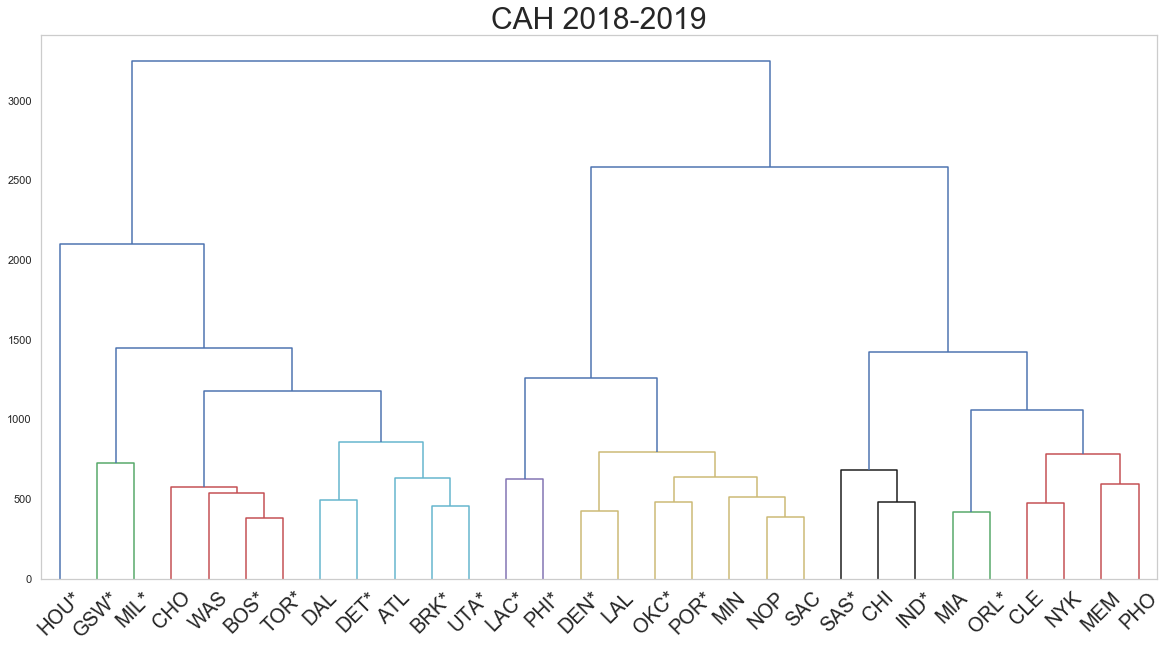

In [72]:
Z = linkage(stats2018,method='ward',metric='euclidean')

fig = plt.subplots(figsize=(20,10))

dendrogram(Z, labels=stats2018.index, orientation='top', color_threshold=1000, leaf_font_size=20) 
plt.title("CAH 2018-2019", fontsize=30)
plt.grid()
plt.show()

Encore une fois, par souci de ne pas surcharger la lecture, nous ne présentons que la CAH de la saison 2018-2019, qui est représentative des 3 autres. 

Les trois classifications mettent en lumière une conséquence primordiale de l'explosion des Warriors : elle a entrainé une **imitation par certaines franchises.** En effet le jeu de Golden State n'apparait plus comme une "valeur aberrante", à l'inverse des saisons initiant la dynastie. Golden State ne forme plus son propre cluster à la hauteur arbitraire 1000. La singularité de l'équipe californienne est donc remise en question, ce qui n'empêche pas Golden State de maintenir sa domination. 

D'autre part, ils exposent l'arrivée d'un **nouveau "style de jeu à part", celui des Houston Rockets.** Nous allons donc analyser l'évolution de leur jeu dans cette ère posterieure au tremblement de terre provoqué par les Warriors.  

### B. Le cas Houston : l'exagération du "Warriors Effect"

En faisant des boxplots sur les principales statistiques de la NBA depuis 2016, on devrait donc observer :
- le retour dans le rang des Golden State Warriors, qui ont perdu en spécificité
- des valeurs aberrantes pour les Rockets, qui deviennent de loin l'équipe la plus originale de la ligue

Vérifions :

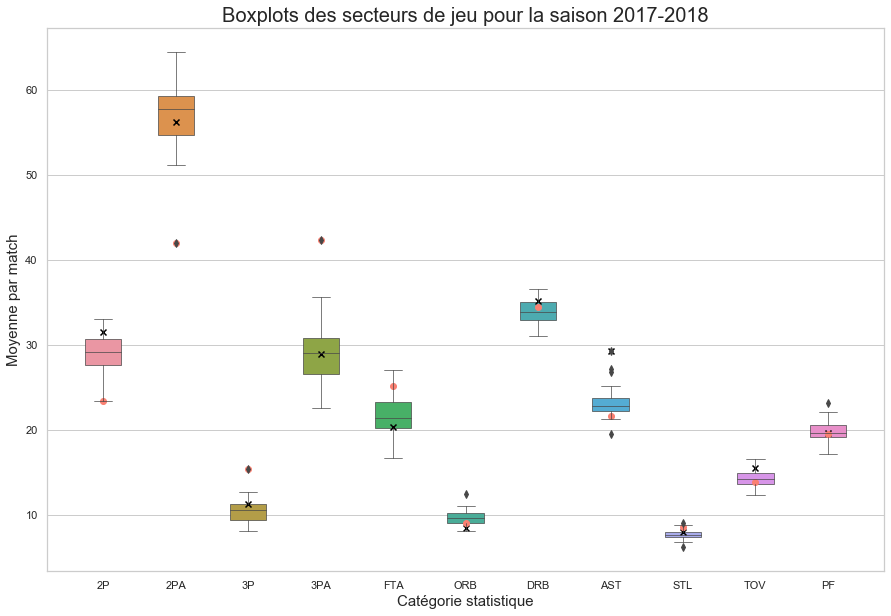

In [73]:
plt.figure(figsize=(15, 10))
sns.set_style("whitegrid")

stats2017_boxplot=stats2017.drop(["W","FG","FGA","FT","TRB","BLK","PTS"],axis=1).astype('float')/82

GoldenStats2017 = stats2017_.groupby('Tms').get_group('GSW') 
GoldenStats2017 = GoldenStats2017.drop(['Season','Win_Indic','Tm','Tms','W_x'], axis=1)
GoldenStats2017 = GoldenStats2017.astype(int)/82 
#On procède de même pour placer les Rockets de Houston
RocketsStats2017=stats2017_.groupby('Tms').get_group('HOU').drop(['Season','Win_Indic','Tm','Tms','W_x'], axis=1).astype(int)
RocketsStats2017=RocketsStats2017/82

ax=sns.boxplot(data = stats2017_boxplot, width=0.5, linewidth=0.7) 
plt.title("Boxplots des secteurs de jeu pour la saison 2017-2018", fontsize=20)
plt.ylabel("Moyenne par match", fontsize=15)
plt.xlabel("Catégorie statistique", fontsize=15)

Y = [GoldenStats2017.iloc[0,2],GoldenStats2017.iloc[0,3], GoldenStats2017.iloc[0,4],GoldenStats2017.iloc[0,5],GoldenStats2017.iloc[0,7],GoldenStats2017.iloc[0,8], GoldenStats2017.iloc[0,9],GoldenStats2017.iloc[0,11],GoldenStats2017.iloc[0,12], GoldenStats2017.iloc[0,14], GoldenStats2017.iloc[0,15]]
Z=[RocketsStats2017.iloc[0,2],RocketsStats2017.iloc[0,3],RocketsStats2017.iloc[0,4],RocketsStats2017.iloc[0,5],RocketsStats2017.iloc[0,7],RocketsStats2017.iloc[0,8],RocketsStats2017.iloc[0,9],RocketsStats2017.iloc[0,11],RocketsStats2017.iloc[0,12],RocketsStats2017.iloc[0,14],RocketsStats2017.iloc[0,15]]

#On place les GSW:
plt.scatter(['2P','2PA','3P','3PA','FTA','ORB','DRB','AST','STL','TOV','PF'],Y, marker= 'x', c = 'black')

#On place les Houston Rockets
plt.scatter(['2P','2PA','3P','3PA','FTA','ORB','DRB','AST','STL','TOV','PF'],Z, marker= 'o', c = 'salmon')

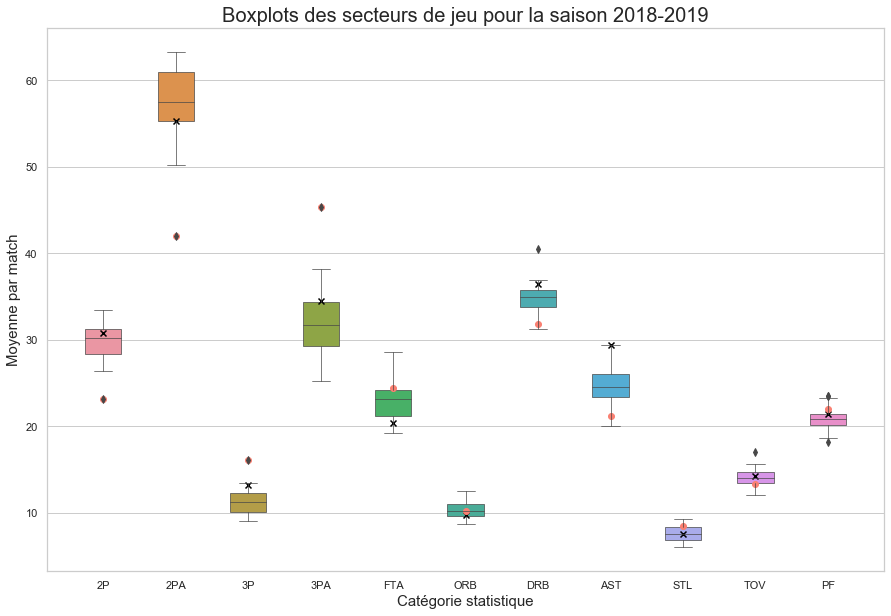

In [74]:
plt.figure(figsize=(15, 10))
sns.set_style("whitegrid")


stats2018_boxplot=stats2018.drop(["W","FG","FGA","FT","TRB","BLK","PTS"],axis=1).astype('float')/82

GoldenStats2018 = stats2018_.groupby('Tms').get_group('GSW') 
GoldenStats2018 = GoldenStats2018.drop(['Season','Win_Indic','Tm','Tms','W_x'], axis=1)
GoldenStats2018 = GoldenStats2018.astype(int)/82 
RocketsStats2018=stats2018_.groupby('Tms').get_group('HOU').drop(['Season','Win_Indic','Tm','Tms','W_x'], axis=1).astype(int)
RocketsStats2018=RocketsStats2018/82

ax=sns.boxplot(data = stats2018_boxplot, width=0.5, linewidth=0.7) 
plt.title("Boxplots des secteurs de jeu pour la saison 2018-2019", fontsize=20)
plt.ylabel("Moyenne par match", fontsize=15)
plt.xlabel("Catégorie statistique", fontsize=15)

Y = [GoldenStats2018.iloc[0,2],GoldenStats2018.iloc[0,3], GoldenStats2018.iloc[0,4],GoldenStats2018.iloc[0,5],GoldenStats2018.iloc[0,7],GoldenStats2018.iloc[0,8], GoldenStats2018.iloc[0,9],GoldenStats2018.iloc[0,11],GoldenStats2018.iloc[0,12], GoldenStats2018.iloc[0,14], GoldenStats2018.iloc[0,15]]
Z=[RocketsStats2018.iloc[0,2],RocketsStats2018.iloc[0,3],RocketsStats2018.iloc[0,4],RocketsStats2018.iloc[0,5],RocketsStats2018.iloc[0,7],RocketsStats2018.iloc[0,8],RocketsStats2018.iloc[0,9],RocketsStats2018.iloc[0,11],RocketsStats2018.iloc[0,12],RocketsStats2018.iloc[0,14],RocketsStats2018.iloc[0,15]]

#On place les GSW:
plt.scatter(['2P','2PA','3P','3PA','FTA','ORB','DRB','AST','STL','TOV','PF'],Y, marker= 'x', c = 'black')

#On place les Houston Rockets
plt.scatter(['2P','2PA','3P','3PA','FTA','ORB','DRB','AST','STL','TOV','PF'],Z, marker= 'o', c = 'salmon')

Le cas Houston est un exemple particulièrement intéressant de ce que ses détracteurs repprochent au "Warriors Effect". **En quelque sorte, cette équipe a porté à son paroxysme l'organisation du jeu uniquement à longue distance, jusqu'à développer un style de jeu unique là où les Warriors semblaient inimitables.**  

Les Rockets de Houston portent en effet bien leur nom puisqu'ils sont la seule équipe qui prend plus de tirs à 3 points qu'à 2 points ! Le jeu proné par le Coach Mike d'Antoni délaisse ainsi le tir intérieur (dont la réussite est aux alentours des 45-50% en moyenne). A la place, les joueurs tentent en grande majorité des tirs à 3 points et des lay-ups (tirs sous le panier). Cette stratégie, baptisée "Run & Gun", explique pourquoi les Rockets dominent la ligue en nombre de tirs à 3 points tentés et réussis, et sont bons derniers dans les mêmes catégories à 2 points.

En revanche, à l'inverse des Warriors, la franchise texane figure en bas du classement des passes. Si Golden State mise sur son jeu collectif, avec une circulation rapide du ballon vers le shooteur le plus libre de marquage, Houston base son jeu sur l'isolation. Cette approche beaucoup plus individuelle du basket consiste à donner la balle à un joueur (en l'occurence souvent James Harden, le dernier MVP en titre), et lui laisser beaucoup d'espace sur le parquet pour qu'il batte son défenseur en driblant.   

**On voit donc avec Houston les ramifications de la nouvelle voie ouverte en NBA par Golden State.** Il n'existe pas qu'une seule façon d'appuyer son jeu sur le tir à 3 points, et de nombreuses franchises tentent d'emboiter le pas aux artilleurs des Warriors. Pourtant, l'équipe californienne maintient sa domination sur la Ligue encore 3 années après sa saison historique, alors que son jeu est décortiqué pour être mieux imité, et contré. 

### C. Des Warriors imités... mais pas égalés

Pour autant, malgré l'imitation du style des Warriors par les autres franchises, les Guerriers de la Baie ont continué à obtenir d'excellentes performances sportives jusqu'à la fin de la saison 2019. Pour cela, les Warriors ont du maintenir leur spécificité au moins dans un domaine. 

Au regard des boxplots, on voit bien que les Warriors continuent de surperformer dans les 3 points réussis par rapport à leurs statistiques de 3 points tentés. La précision des Warriors leur permet-elle de continuer à surnager dans cette ligue ? 

/Users/clementchaffard/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/Users/clementchaffard/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/clementchaffard/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/clementchaffard/anaconda3/lib/python3.7/site

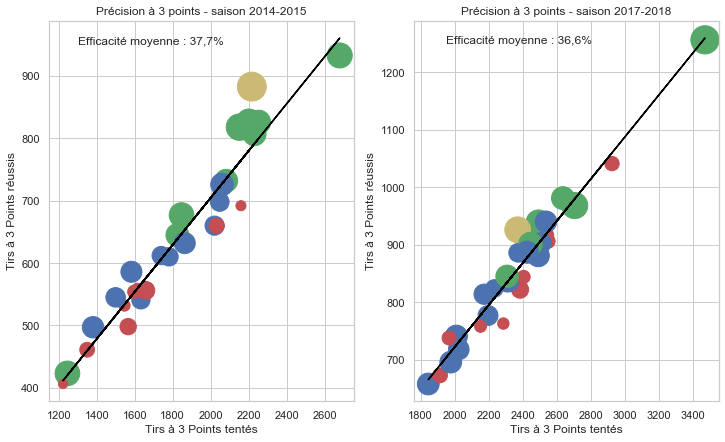

In [75]:
stats2014['3PA'] = stats2014['3PA'].astype('int')
stats2014['3P'] = stats2014['3P'].astype('int')
stats2014['W'] = stats2014['W'].astype('int')

stats2014.sort_values(by=['3P'])
area2014 = stats2014['W']**(1.6)

stats2014['Group']= stats2014['W']
stats2014['Group'] = stats2014['Group'].astype(str)

for i in range(0,30) :
    if int(stats2014['W'][i]) > stats2014['W'].astype(int).quantile(.66) :
        stats2014['Group'][i] = "g"
    else :
        if int(stats2014['W'][i]) > stats2014['W'].astype(int).quantile(.34) :
            stats2014['Group'][i] = "b"
        else : 
            stats2014['Group'][i] = "r"
    if stats2014['W'].index[i] == "GSW*" :
        stats2014['Group'][i] = "y"

stats2017['3PA'] = stats2017['3PA'].astype('int')
stats2017['3P'] = stats2017['3P'].astype('int')
stats2017['W'] = stats2017['W'].astype('int')

stats2017['Group']= stats2017['W']
stats2017['Group'] = stats2017['Group'].astype(str)

for i in range(0,30) :
    if stats2017['W'][i] > stats2017['W'].quantile(.66) :
        stats2017['Group'][i] = "g"
    else :
        if stats2017['W'][i] > stats2017['W'].quantile(.34) :
            stats2017['Group'][i] = "b"
        else : 
            stats2017['Group'][i] = "r"
    if stats2017['W'].index[i] == "GSW*" :
        stats2017['Group'][i] = 'y'

stats2017.sort_values(by=['3P'])
area2017 = stats2017['W']**(1.6)

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(12,7))

ax0.scatter('3PA','3P', data=stats2014, s=area2014, color ='Group')
ax0.set(xlabel='Tirs à 3 Points tentés', ylabel='Tirs à 3 Points réussis',title='Précision à 3 points - saison 2014-2015')

A = np.poly1d(np.polyfit(stats2014['3PA'].astype(int),stats2014['3P'].astype(int),1))
ax0.plot(stats2014['3PA'].astype(int), A(stats2014['3PA'].astype(int)),color='black')
ax0.text(1300, 950, "Efficacité moyenne : 37,7%", fontsize=12)

ax1.scatter('3PA', '3P', data=stats2017, s=area2017, c='Group')
ax1.set(xlabel='Tirs à 3 Points tentés', ylabel='Tirs à 3 Points réussis',title='Précision à 3 points - saison 2017-2018')

A = np.poly1d(np.polyfit(stats2017['3PA'],stats2017['3P'],1))
ax1.plot(stats2017['3PA'], A(stats2017['3PA']),color='black',linestyle ='-')
ax1.text(1950, 1250, "Efficacité moyenne : 36,6%", fontsize=12)

plt.show()


Le 1er graphique démontre que Golden State, ici en jaune, est **une équipe à la précision redoutable.** Elle surnage dans la zone des équipes dominant la Ligue (en vert), car bien au dessus de la précision moyenne en NBA. **Le tir à 3 points est donc une arme que les Warriors maitrisent comme personne au cours des saisons 2014-2015.**  

Pourtant, le 2e **graphique est symptomatique de la révolution qu'a connu la NBA** après le premier titre de Golden State. Alors qu'en 2014-2015, les groupes se répartissaient particulièremet bien le long de l'axe orange moyen, ce n'est plus le cas en 2017. En effet, les plus "mauvaises équipes de la ligue" ne sont plus celles qui shootaient uniquement peu à 3 points. Desormais, ce sont surtout celle qui shootent "mal" à 3 points, c'est à dire qui sont en dessous de l'axe moyen.

D'autre part, la majorité des équipes se situent désormais dans une fenetre de 800 à 1000 tirs réussis pour 2200 à 2800 tentés. En 2014-2015, cette même fenêtre majoritaire se positionnait entre 500 et 600 tirs réussis pour 1600 à 2300 tentés. **La totalité de la Ligue tire désormais bien plus souvent derrière la ligne à 3 pts, mais également avec une meilleure précision !**   

Enfin, **les Warriors tirent toujours leur épingle du jeu, avec une précision plus létale que celle de leurs adversaires.** Ils sont certes rattrapés en nombre de tirs tentés, mais dominent nettement la précision, vu la position du point jaune par rapport à l'axe orange. 

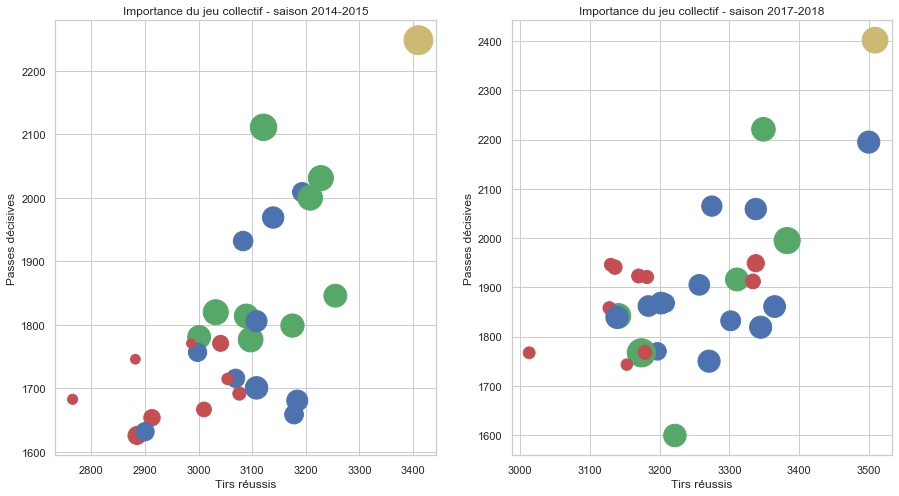

In [76]:
stats2014['FG'] = stats2014['FG'].astype('int')
stats2014['AST'] = stats2014['AST'].astype('int')
stats2014['W'] = stats2014['W'].astype('int')
area2014 = stats2014['W']**(1.6)

stats2017['FG'] = stats2017['FG'].astype('int')
stats2017['AST'] = stats2017['AST'].astype('int')
stats2017['W'] = stats2017['W'].astype('int')
area2017 = stats2017['W']**(1.6)

fig, (ax0,ax1) = plt.subplots(1,2,figsize=(15,8))

ax0.scatter('FG', 'AST', data=stats2014, s=area2014, color ='Group', )
ax0.set(xlabel='Tirs réussis', ylabel='Passes décisives',title='Importance du jeu collectif - saison 2014-2015')

ax1.scatter('FG', 'AST', data=stats2017, s=area2017, c='Group')
ax1.set(xlabel='Tirs réussis', ylabel='Passes décisives',title='Importance du jeu collectif - saison 2017-2018')

plt.show()

En 2014, là encore, les Warriors font preuve d'un **jeu collectif hors norme face à leurs opposants.** La position du point jaune (GSW) témoigne du choix fort et différenciant qui définit le style jeu des Warriors : passer la balle à un shooteur adroit démarqué, le plus souvent possible.

On peut tirer du 2e graphique les mêmes conclusions qu'à la cellule précédente concernant la mutation connue par la NBA. La fenêtre majoritaire dans laquelle se situent les équipes en 2017 est la suivante : 1800-2100 passes décisives pour 3100-3400 tirs réussis. Cette même fenêtre était de l'ordre de 1700-2000 passes décisives pour 3000-3200 tirs réussis.

**Golden State conserve en 2017-2018 sa position unique, bien que son avantage se soit réduit. Le style de jeu des Warriors reste en conséquence inimité.**

## Conclusion

Nous avons prouvé que les Golden State Warriors de San Francisco ont **développé un nouveau style de basketball** à partir de la saison 2014-2015, en s'appuyant sur un **effectif soudé et adroit dans l'art des trois points et de la passe**. Nous avons analysé les particularités de ce "Warriors style" en comparant les statistiques de la franchise californienne aux statistiques de la ligue. Cette comparaison a révélé que la différenciation des Warriors était principalement **offensive**, avec un jeu construit et **axé sur les 3 points**, délaissant les armes traditionnelles tels que la pénétration, les 2 points et la recherche de fautes et de lancers-francs. Défensivement, nous avons montré que les Warriors n'avaient pas un style résolument différent du style de la ligue ; on a cependant pu noter qu'en **jouant "small ball"**, avec des joueurs petits au profil offensif, les Warriors subissaient marginalement plus de tirs et défendaient avec moins d'agressivité que la moyenne.

Cela a abouti à créer un **avantage compétitif pour les Warriors** face aux autres franchises lors des saisons 2014-2015 et 2015-2016. Il a permis aux joueurs emmenés par Stephen Curry (élu deux fois meilleur joueur de la ligue) d'établir un nouveau record de victoires en 2015-2016 (73 en 82 matchs).

Par la suite, nous avons prouvé que les différentes franchises de NBA ont analysé et en quelque sorte **copié le style des Warriors** : ainsi, le **nombre de 3 points tentés et réussis a par exemple explosé depuis la saison 2015-2016**.

En conséquence, l'observation des k-moyennes nous a permis de remarquer que le nombre de 3 points tentés et réussis était devenu un **axe encore plus explicatif des différences de styles de jeu en 2017 qu'en 2010**.

Par la suite, nous avons cherché à savoir si **le tir à 3 points était devenu l'arme fatale en NBA.** Pour ce faire, nous avons étudié les corrélations entre le nombre de victoires et celui de 3 points tentés et réussis. De l'ordre respectivement de 14 et 27% en 2010, la corrélation n'a cessé d'augmenter pour atteindre 31 (resp. 50%) en 2018. En comparant les répartitions du nombre de tirs à 3 points tentés et réussis chez les top équipes et chez les autres équipes de la ligue, on a observé trois tendances : 
- D'abord, le fait que les équipes les plus fortes ont été celles qui ont le plus rapidement pris en marche le train du trois points (celles qui ont le plus tenté à 3 points).
- Ensuite, une convergence généralisée du nombre de tirs à 3 points tentés. 
- Une absence de convergence du nombre de tirs à 3 points réussis : aujourd'hui, les bonnes équipes sont souvent celles qui tirent à 3 points avec précision.


Les régressions conduites par la suite ont confirmé **l'effet causal positif et croissant du nombre de tirs à 3 points réussis sur le nombre de victoires à chaque saison**. A contrario, il a démontré l'**absence de causalité entre les tirs à 2 points et le nombre de victoires**, expliquant la fin (regrettée par beaucoup) des 'midrange 2 points shots', ces tirs à 2 points à 5m du panier, et la débâcle de joueurs qui n'ont pas su s'adapter au nouveau basketball, à l'image de Carmelo Anthony. Meilleur marqueur de la saison 2012-2013, Mr Clutch a ensuite perdu de son impact, jusqu'à se retrouver au chômage lors de la saison 2018-2019...

Nous avons dans un troisième temps souhaité savoir si **l'influence du jeu des Warriors s'était répandue outratlantique**, et nous avons analysé les statistiques de la Jeep Elite Pro A, le championnat français. Nous y avons observé une nette hausse du nombre de 3 points dans un premier temps, suivie d'une stabilité ; accompagnée d'une nette hausse continue du nombre de passes décisives sur la période. **Le basket européen, moins spectaculaire car plus académique, propose de plus en plus de systèmes dessinés pour aboutir sur un tir à 3 points, mais surtout de plus en plus de systèmes générant des passes décisives, en jeu plus collectif.** Or, avant que les Warriors ne prouvent leur viabilité à long terme, les coachs européens doutaient rationnellement de l'intérêt de ce genre d'actions, au plus faible pourcentage de réussite que des shoots pris plus proches de l'arceau. 

Enfin, nous avons souhaité déterminer si - et comment - dans un **contexte de convergence des modes de jeu vers celui des Warriors**, les Franciscanais pouvaient **garder leur identité, leur spécificité.** L'analyse a révélé que les Warriors avaient beau être imités, ils n'étaient pas pour autant égalés : beaucoup plus précis que la moyenne de la ligue, ils **continuent également de surnager grâce à leur jeu collectif sans équivalent.** Reste pour les Warriors à ne pas perdre leur identité...

Et ce n'est pas gagné ! En 2019, Shaun Livingston est parti à la retraite, Kevin Durant et André Iguodala ont été échangés : ce sont donc 3 des 7 joueurs majeurs des Warriors qui ont quitté le navire à l'été, et la stabilité qui a joué une part si importante dans la réussite des GSW a été mise en péril. 

Couplée avec un recrutement déconnecté des principes de jeu des Warriors (D'Angelo Russell, shooteur solitaire) et aux graves blessures des deux stars de l'équipe (Stephen Curry et Klay Thompson), cela mène les Warriors dans une impasse en ce début de saison 2019-2020. A l'heure où nous écrivons ces lignes, la franchise californienne est tout simplement... dernière de la ligue avec 5 victoires en 28 matchs.

*Une saison noire s'annonce donc dans la baie... en attendant une prochaine révolution la saison prochaine, des Warriors ou d'une autre franchise ?*